In [ ]:
# Compare OI (Gregory et al, 2021) and simple binning (Tsamados)

In [1]:
%matplotlib inline
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as io
import numpy as np
import glob
#from read_cryosat_day import get_cryosat_thickness
#from read_cryosat_day import get_cryosat_freeboard
#from read_cryosat_day import get_cryosat_elevation
#from read_cryosat_day import get_cryosat_sla
from scipy import stats
import datetime
from matplotlib.patches import Polygon
import time
import pickle
from datetime import date, timedelta
from netCDF4 import Dataset 

from scipy.interpolate import griddata





In [2]:
! pwd

/Users/micheltsamados/Documents/Coding/Binning


In [4]:
! ls /Volumes/EASE

freeboard_daily_interpolated freeboard_daily_processed


In [46]:
! ls Data_all_3days/

FB


In [5]:
from datetime import date, timedelta

def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)



In [17]:
# ! ls ~/Documents/Data/OI/freeboard_daily_interpolated/CS2_S3_GPOD/CS2
! ls /Volumes/EASE/freeboard_daily_interpolated/25km/

AK_CPOM    CS2S3_CPOM CS2S3_LARM CS2_CPOM   CS2_LARM   IS2        NETCDFs


# Load all OI data 




In [314]:
! ls /Volumes/EASE/freeboard_daily_interpolated/25km/

AK_CPOM    CS2S3_CPOM CS2_CPOM   IS2
AK_LARM    CS2S3_LARM CS2_LARM   NETCDFs


In [315]:
# ! ls /Volumes/EASE/freeboard_daily_interpolated/25km/AK_CPOM/

In [460]:
#Initialize
fb_OI={}
year1=2019
year2=2020    
year1str  ='%02d' %(year1)
year2str  ='%02d' %(year2)

#load
datapath_OI='/Volumes/EASE/freeboard_daily_interpolated/25km/'
path_names=['AK_CPOM','AK_LARM','CS2S3_CPOM','CS2S3_LARM','CS2_CPOM','CS2_LARM','IS2']
start_date = date(year1, 10, 5)
end_date = date(year2, 4, 23)
for n in path_names:
    print(n)
    fb_OI_list=[]
    for single_date in daterange(start_date, end_date):
        yearstr0  ='%02d' %(single_date.year)
        monthstr0 ='%02d' %(single_date.month)
        daystr0 ='%02d' %(single_date.day)
        print(single_date.strftime("%Y-%m-%d"),single_date.year,single_date.month,single_date.day)
        try: 
            fb_OI_list.append(np.load(datapath_OI+n+'/FB_interp_'+year1str+'-'+year2str+'_25km_'+yearstr0+monthstr0+daystr0+'.npy'))
        except:
            print('no data',single_date)
            fb_OI_list.append(np.full((360, 360), np.nan))

    fb_OI[n]=np.asarray(fb_OI_list)




In [164]:
year1str+'/'+year2str

'2019/2020'

# Plot data 


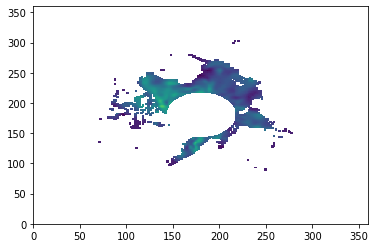

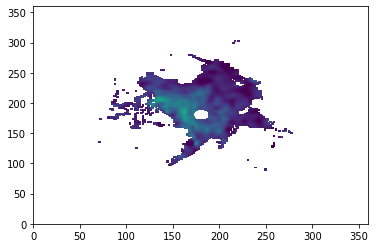

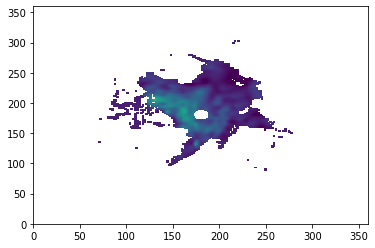

In [334]:
plt.pcolor(fb_OI['AK_LARM'][30],vmin=0,vmax=0.5)
plt.show()
plt.pcolor(fb_OI['CS2_CPOM'][30],vmin=0,vmax=0.5)
plt.show()
plt.pcolor(fb_OI['CS2S3_CPOM'][30],vmin=0,vmax=0.5)
# plt.show()
# plt.pcolor(fb_OI['CS2S3_CPOM'][0]-fb_OI['CS2_CPOM'][0],vmin=-0.1,vmax=0.1)

# Load all binned data

In [78]:
! ls /Volumes/EASE/freeboard_daily_processed/CS2_CPOM/

dailyFB_25km_2010-2011_season.pkl dailyFB_50km_2010-2011_season.pkl
dailyFB_25km_2011-2012_season.pkl dailyFB_50km_2011-2012_season.pkl
dailyFB_25km_2012-2013_season.pkl dailyFB_50km_2012-2013_season.pkl
dailyFB_25km_2013-2014_season.pkl dailyFB_50km_2013-2014_season.pkl
dailyFB_25km_2014-2015_season.pkl dailyFB_50km_2014-2015_season.pkl
dailyFB_25km_2015-2016_season.pkl dailyFB_50km_2015-2016_season.pkl
dailyFB_25km_2016-2017_season.pkl dailyFB_50km_2016-2017_season.pkl
dailyFB_25km_2017-2018_season.pkl dailyFB_50km_2017-2018_season.pkl
dailyFB_25km_2018-2019_season.pkl dailyFB_50km_2018-2019_season.pkl
dailyFB_25km_2019-2020_season.pkl dailyFB_50km_2019-2020_season.pkl
dailyFB_25km_2020-2021_season.pkl dailyFB_50km_2020-2021_season.pkl


In [73]:
! ls /Volumes/EASE/freeboard_daily_processed/CS2S3_CPOM/

CS2_SARIN_dailyFB_25km_2018-2019_season.pkl
CS2_SARIN_dailyFB_25km_2019-2020_season.pkl
CS2_SARIN_dailyFB_50km_2018-2019_season.pkl
CS2_SARIN_dailyFB_50km_2019-2020_season.pkl
CS2_SAR_dailyFB_25km_2018-2019_season.pkl
CS2_SAR_dailyFB_25km_2019-2020_season.pkl
CS2_SAR_dailyFB_50km_2018-2019_season.pkl
CS2_SAR_dailyFB_50km_2019-2020_season.pkl
S3A_dailyFB_25km_2018-2019_season.pkl
S3A_dailyFB_25km_2019-2020_season.pkl
S3A_dailyFB_50km_2018-2019_season.pkl
S3A_dailyFB_50km_2019-2020_season.pkl
S3B_dailyFB_25km_2018-2019_season.pkl
S3B_dailyFB_25km_2019-2020_season.pkl
S3B_dailyFB_50km_2018-2019_season.pkl
S3B_dailyFB_50km_2019-2020_season.pkl


In [67]:
! ls /Volumes/EASE/freeboard_daily_processed/AK_CPOM

dailyFB_25km_2013-2014_season.pkl dailyFB_50km_2013-2014_season.pkl
dailyFB_25km_2014-2015_season.pkl dailyFB_50km_2014-2015_season.pkl
dailyFB_25km_2015-2016_season.pkl dailyFB_50km_2015-2016_season.pkl
dailyFB_25km_2016-2017_season.pkl dailyFB_50km_2016-2017_season.pkl
dailyFB_25km_2017-2018_season.pkl dailyFB_50km_2017-2018_season.pkl
dailyFB_25km_2018-2019_season.pkl dailyFB_50km_2018-2019_season.pkl
dailyFB_25km_2019-2020_season.pkl dailyFB_50km_2019-2020_season.pkl
dailyFB_25km_2020-2021_season.pkl dailyFB_50km_2020-2021_season.pkl


In [55]:
datapath='/Volumes/EASE/freeboard_daily_processed/CS2S3_CPOM/'

In [58]:
import pickle
f = open(datapath+'S3A_dailyFB_25km_2018-2019_season.pkl','rb')
test = pickle.load(f)

In [84]:
test[yearstr0+'03'+'01'].shape

(360, 360)

In [170]:
test.keys()

In [81]:
single_date.strftime("%Y-%m-%d")

'2019-04-22'

In [82]:
yearstr0+monthstr0+daystr0

'20190422'

In [459]:
#Initialize
fb_BIN={}
year1=2019
year2=2020    
year1str  ='%02d' %(year1)
year2str  ='%02d' %(year2)

#load
datapath='/Volumes/EASE/freeboard_daily_processed/'
path_names=['CS2_CPOM','CS2_LARM','IS2','AK_CPOM','AK_LARM']
start_date = date(year1, 10, 5)
end_date = date(year2, 4, 23)
for n in path_names:
    print(n)
    fb_BIN_list=[]
    f = open(datapath+n+'/dailyFB_25km_'+year1str+'-'+year2str+'_season.pkl','rb')    
    temp=pickle.load(f)
    for single_date in daterange(start_date, end_date):
        yearstr0  ='%02d' %(single_date.year)
        monthstr0 ='%02d' %(single_date.month)
        daystr0 ='%02d' %(single_date.day)
        print(single_date.strftime("%Y-%m-%d"),single_date.year,single_date.month,single_date.day)
        try: 
            print(yearstr0+monthstr0+daystr0)
            fb_BIN_list.append(temp[yearstr0+monthstr0+daystr0])
        except:
            print('no data',single_date)
            fb_BIN_list.append(np.full((360, 360), np.nan))

    fb_BIN[n]=np.asarray(fb_BIN_list)


fb_BIN['CS2S3_CPOM']={}

path_names=['CS2_SARIN','CS2_SAR','S3A','S3B']
start_date = date(year1, 10, 5)
end_date = date(year2, 4, 23)
for n in path_names:
    f = open(datapath+'CS2S3_CPOM/'+n+'_dailyFB_25km_'+year1str+'-'+year2str+'_season.pkl','rb')
    temp=pickle.load(f)
    print(n)
    fb_BIN_list=[]
    for single_date in daterange(start_date, end_date):
        yearstr0  ='%02d' %(single_date.year)
        monthstr0 ='%02d' %(single_date.month)
        daystr0 ='%02d' %(single_date.day)
        print(single_date.strftime("%Y-%m-%d"),single_date.year,single_date.month,single_date.day)
        try: 
            fb_BIN_list.append(temp[yearstr0+monthstr0+daystr0])
        except:
            print('no data',single_date)
            fb_BIN_list.append(np.full((360, 360), np.nan))

    fb_BIN['CS2S3_CPOM'][n]=np.asarray(fb_BIN_list)
    
fb_BIN['CS2S3_LARM']={}    
path_names=['CS2','S3']
start_date = date(year1, 10, 5)
end_date = date(year2, 4, 23)
for n in path_names:
    f = open(datapath+'CS2S3_LARM/'+n+'_dailyFB_25km_'+year1str+'-'+year2str+'_season.pkl','rb')
    temp=pickle.load(f)
    print(n)
    fb_BIN_list=[]
    for single_date in daterange(start_date, end_date):
        yearstr0  ='%02d' %(single_date.year)
        monthstr0 ='%02d' %(single_date.month)
        daystr0 ='%02d' %(single_date.day)
        print(single_date.strftime("%Y-%m-%d"),single_date.year,single_date.month,single_date.day)
        try: 
            fb_BIN_list.append(temp[yearstr0+monthstr0+daystr0])
        except:
            print('no data',single_date)
            fb_BIN_list.append(np.full((360, 360), np.nan))

    fb_BIN['CS2S3_LARM'][n]=np.asarray(fb_BIN_list)    




In [458]:
fb_BIN['CS2S3_CPOM']={}

path_names=['CS2_SARIN','CS2_SAR','S3A','S3B']
start_date = date(year1, 10, 5)
end_date = date(year2, 4, 23)
for n in path_names:
    f = open(datapath+'CS2S3_CPOM/'+n+'_dailyFB_25km_'+year1str+'-'+year2str+'_season.pkl','rb')
    temp=pickle.load(f)
    print(n)
    fb_BIN_list=[]
    for single_date in daterange(start_date, end_date):
        yearstr0  ='%02d' %(single_date.year)
        monthstr0 ='%02d' %(single_date.month)
        daystr0 ='%02d' %(single_date.day)
        print(single_date.strftime("%Y-%m-%d"),single_date.year,single_date.month,single_date.day)
        try: 
            fb_BIN_list.append(temp[yearstr0+monthstr0+daystr0])
        except:
            print('no data',single_date)
            fb_BIN_list.append(np.full((360, 360), np.nan))

    fb_BIN['CS2S3_CPOM'][n]=np.asarray(fb_BIN_list)
    
fb_BIN['CS2S3_LARM']={}    
path_names=['CS2','S3']
start_date = date(year1, 10, 5)
end_date = date(year2, 4, 23)
for n in path_names:
    f = open(datapath+'CS2S3_LARM/'+n+'_dailyFB_25km_'+year1str+'-'+year2str+'_season.pkl','rb')
    temp=pickle.load(f)
    print(n)
    fb_BIN_list=[]
    for single_date in daterange(start_date, end_date):
        yearstr0  ='%02d' %(single_date.year)
        monthstr0 ='%02d' %(single_date.month)
        daystr0 ='%02d' %(single_date.day)
        print(single_date.strftime("%Y-%m-%d"),single_date.year,single_date.month,single_date.day)
        try: 
            fb_BIN_list.append(temp[yearstr0+monthstr0+daystr0])
        except:
            print('no data',single_date)
            fb_BIN_list.append(np.full((360, 360), np.nan))

    fb_BIN['CS2S3_LARM'][n]=np.asarray(fb_BIN_list)    



In [373]:
fb_BIN.keys()

dict_keys(['CS2_CPOM', 'CS2_LARM', 'IS2', 'AK_CPOM', 'AK_LARM', 'CS2S3_CPOM', 'CS2S3_LARM'])

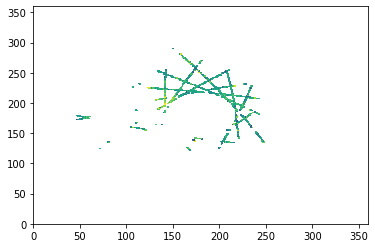

In [311]:
plt.pcolor(fb_BIN['AK_CPOM'][100])

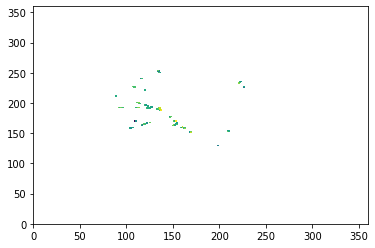

In [174]:
plt.pcolor(fb_BIN['CS2S3_CPOM']['CS2_SARIN'][50])

In [131]:
fb_BIN['CS2S3_CPOM']['CS2_SARIN'].shape

(200, 360, 360)

In [132]:
fb_BIN.keys()

dict_keys(['CS2_CPOM', 'CS2_LARM', 'IS2', 'AK_CPOM', 'CS2S3_CPOM', 'CS2S3_LARM'])

In [133]:
fb_OI.keys()

dict_keys(['CS2_CPOM', 'CS2S3_CPOM', 'CS2_LARM', 'AK_CPOM', 'CS2S3_LARM', 'IS2'])

In [146]:
for i in fb_OI.keys():
    print(i)

CS2_CPOM
CS2S3_CPOM
CS2_LARM
AK_CPOM
CS2S3_LARM
IS2


In [138]:
fb_OI['CS2S3_CPOM'].shape

(200, 360, 360)

# Plot time series masked 

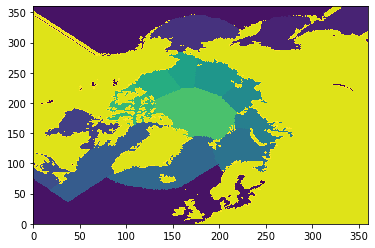

In [130]:
#load mask
mask_EASE2=np.load('NSIDC_Regions_Mask.npy')
plt.pcolor(mask_EASE2)

In [135]:
mask_EASE2.shape

(360, 360)

In [162]:
fb_OI['CS2S3_LARM'].shape

(200, 360, 360)

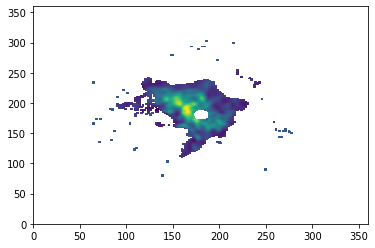

In [167]:
plt.pcolor(fb_OI['CS2_LARM'][10])

# OI data regionally 

In [419]:
fb_OI.keys()

dict_keys(['AK_CPOM', 'AK_LARM', 'CS2S3_CPOM', 'CS2S3_LARM', 'CS2_CPOM', 'CS2_LARM', 'IS2'])

In [421]:
fb_BIN.keys()

dict_keys(['CS2_CPOM', 'CS2_LARM', 'IS2', 'AK_CPOM', 'AK_LARM', 'CS2S3_CPOM', 'CS2S3_LARM'])

In [420]:
fb_BIN[n].keys()

dict_keys(['CS2_SARIN', 'CS2_SAR', 'S3A', 'S3B'])

In [422]:
fb_BIN['CS2_CPOM'].shape

(201, 360, 360)

200
200
200
200
200
200
200


/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: Mean of empty slice
  del sys.path[0]


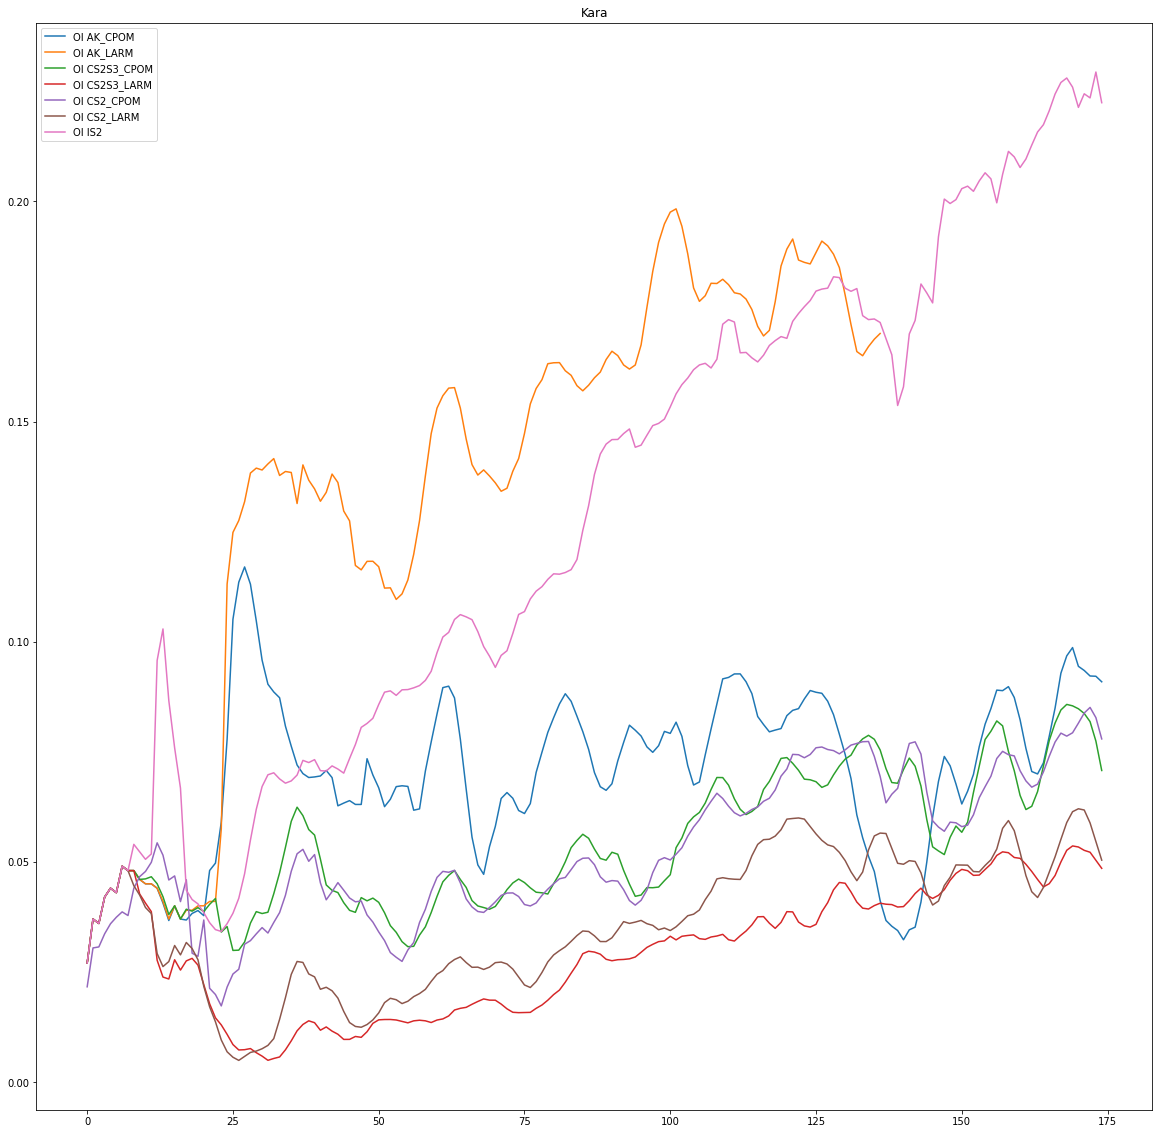

200
200
200
200
200
200
200


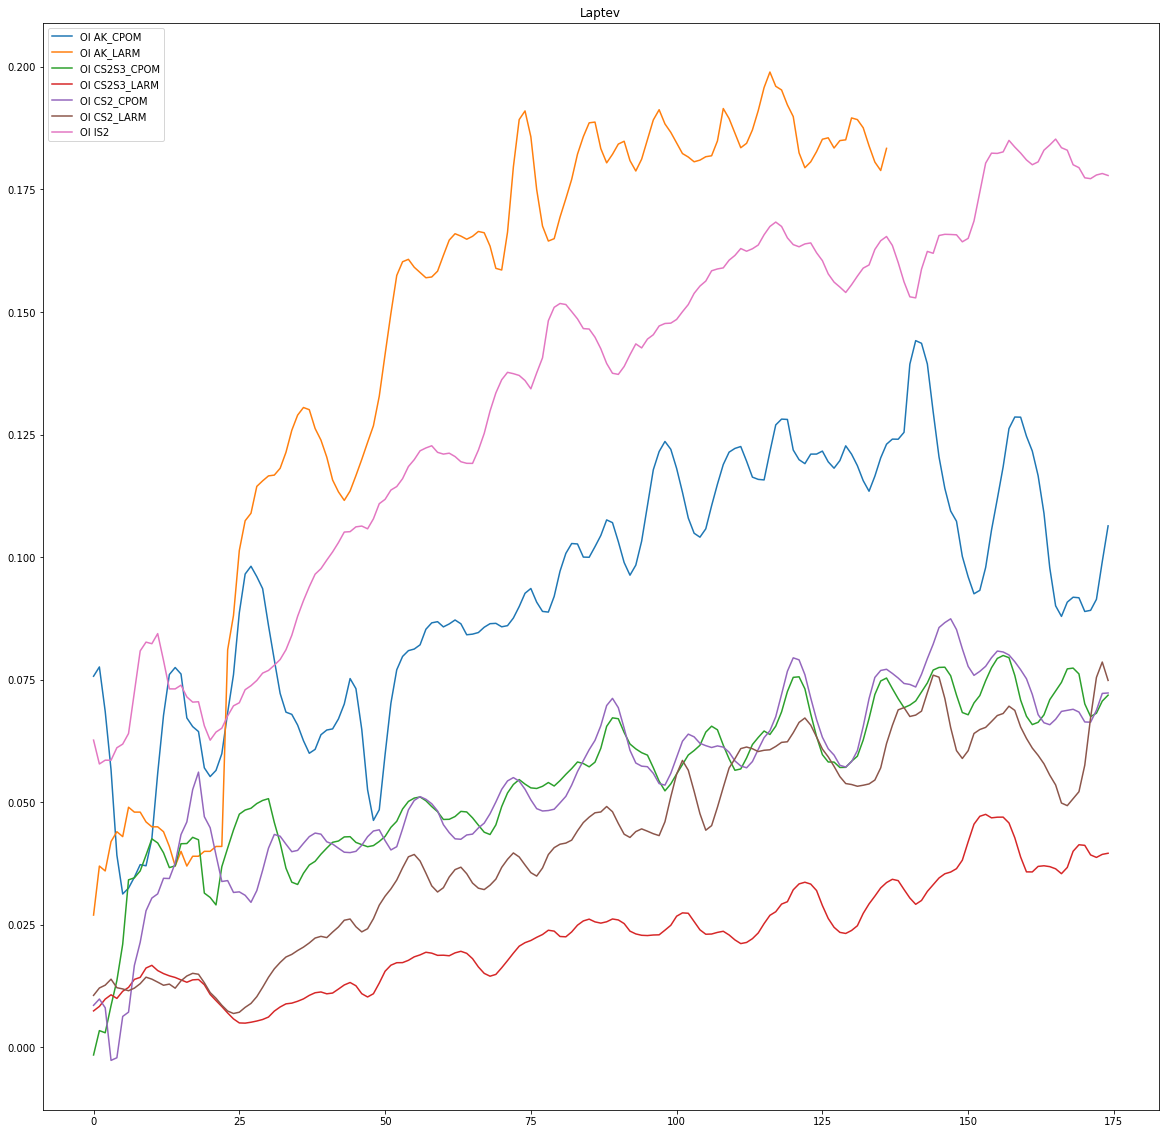

200
200
200
200
200
200
200


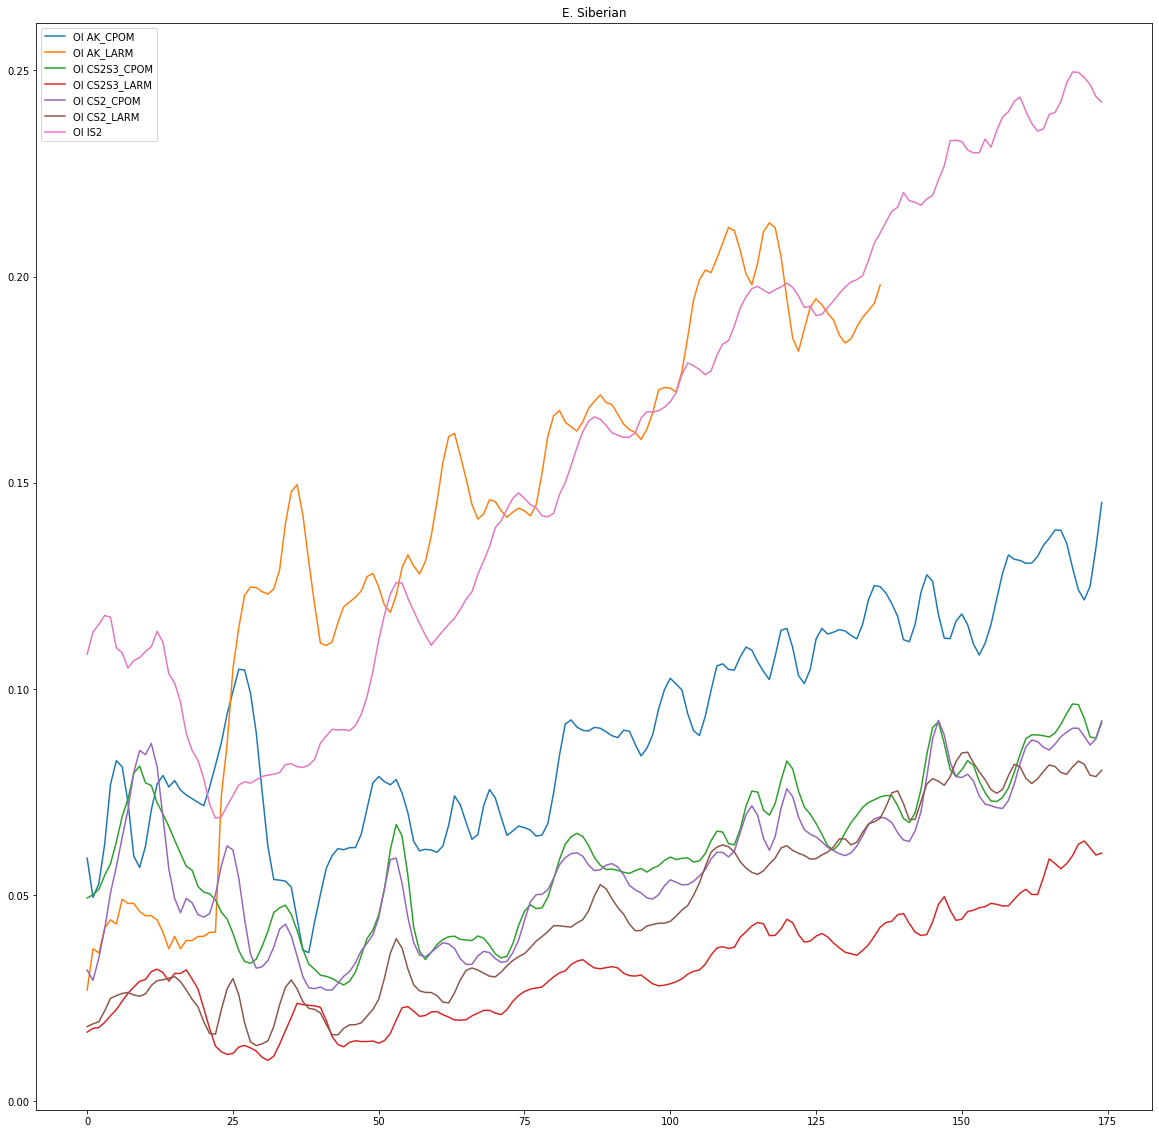

200
200
200
200
200
200
200


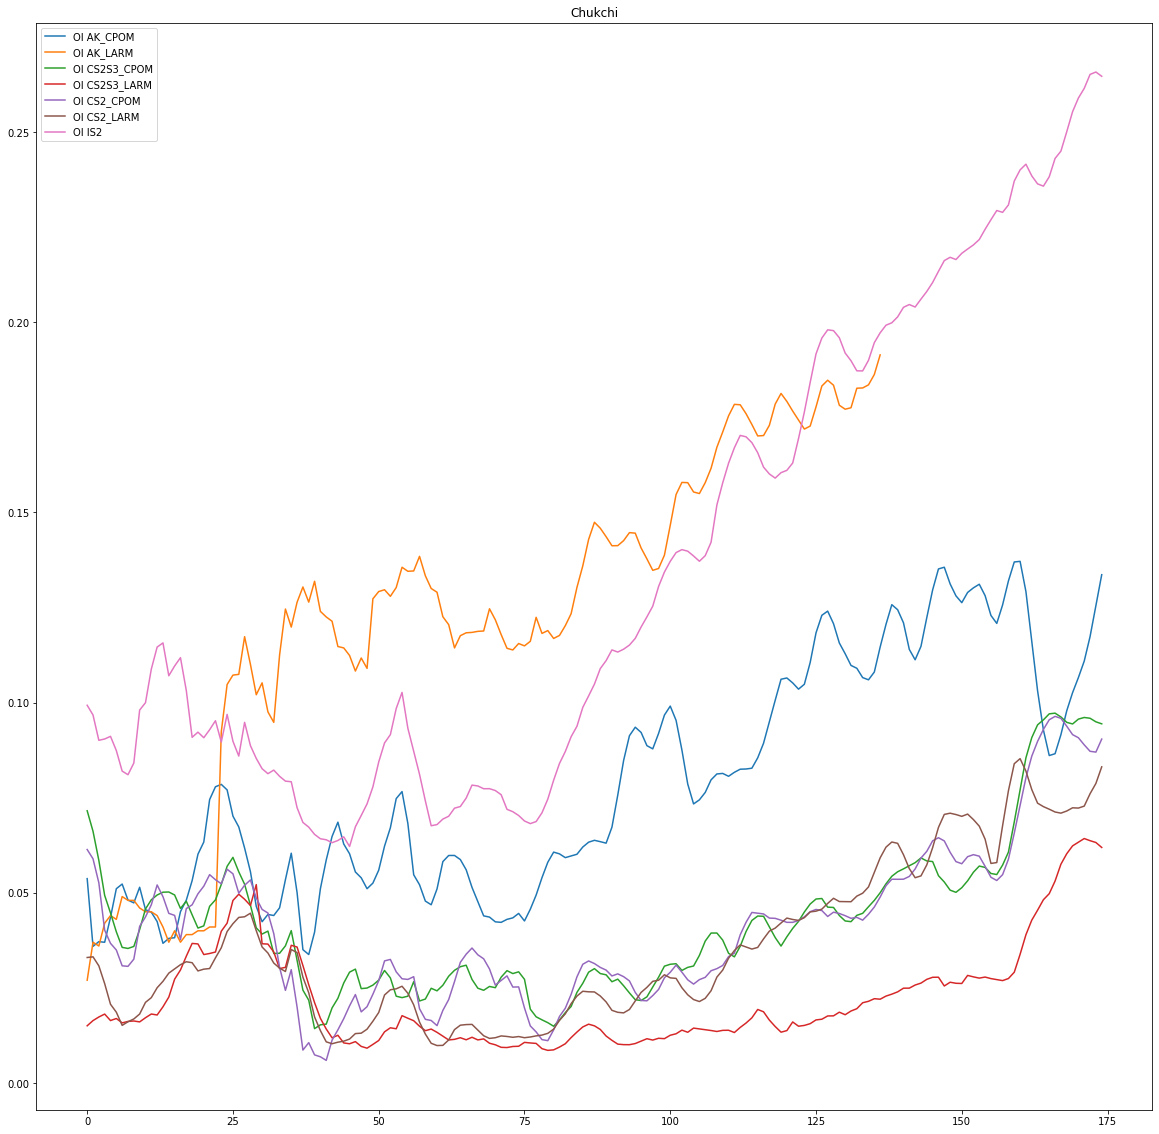

200
200
200
200
200
200
200


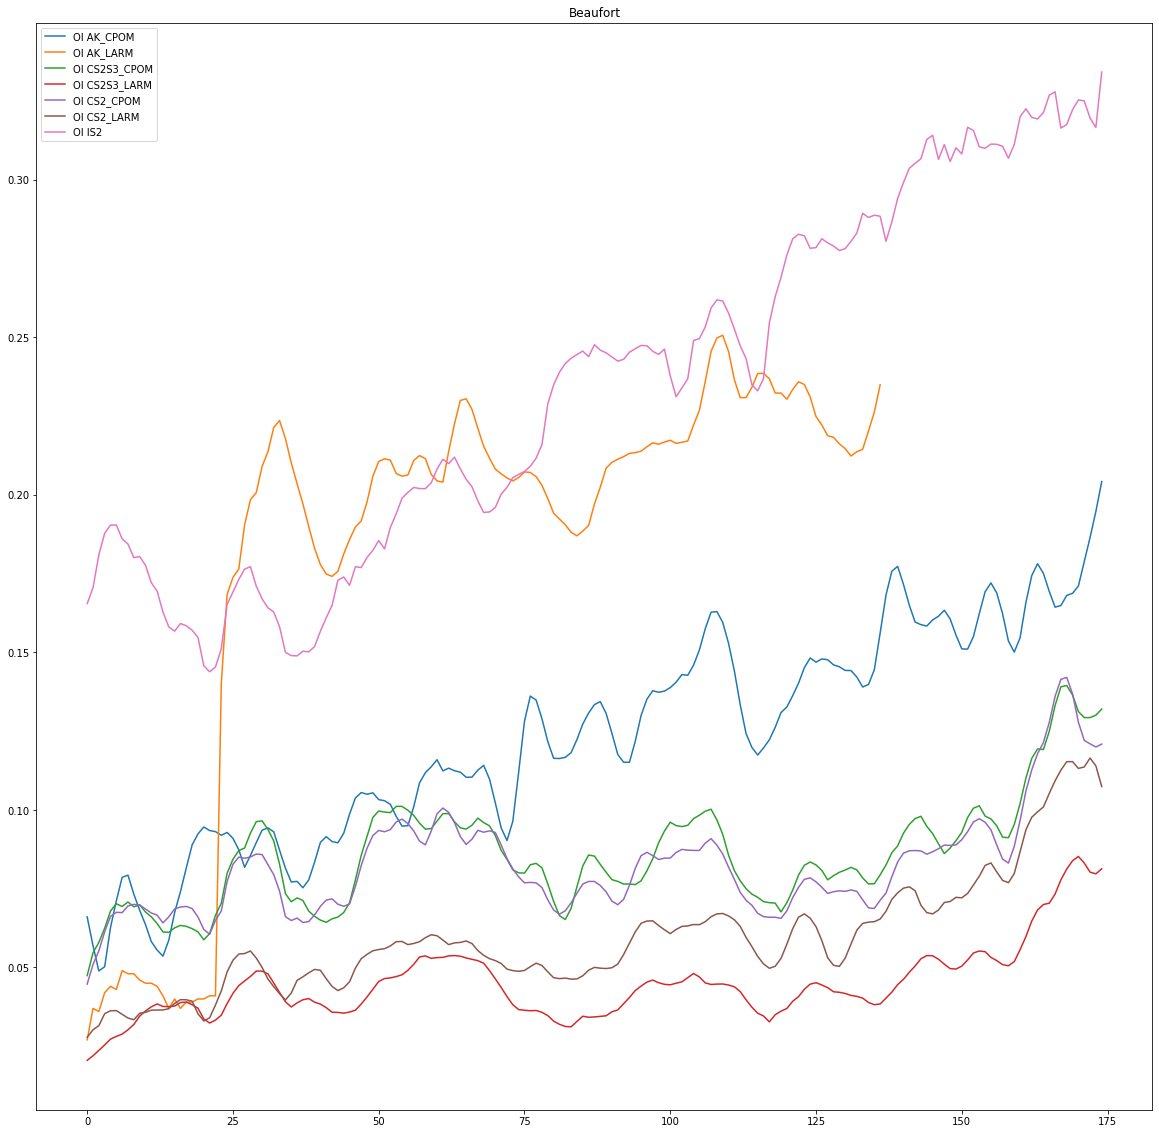

200
200
200
200
200
200
200


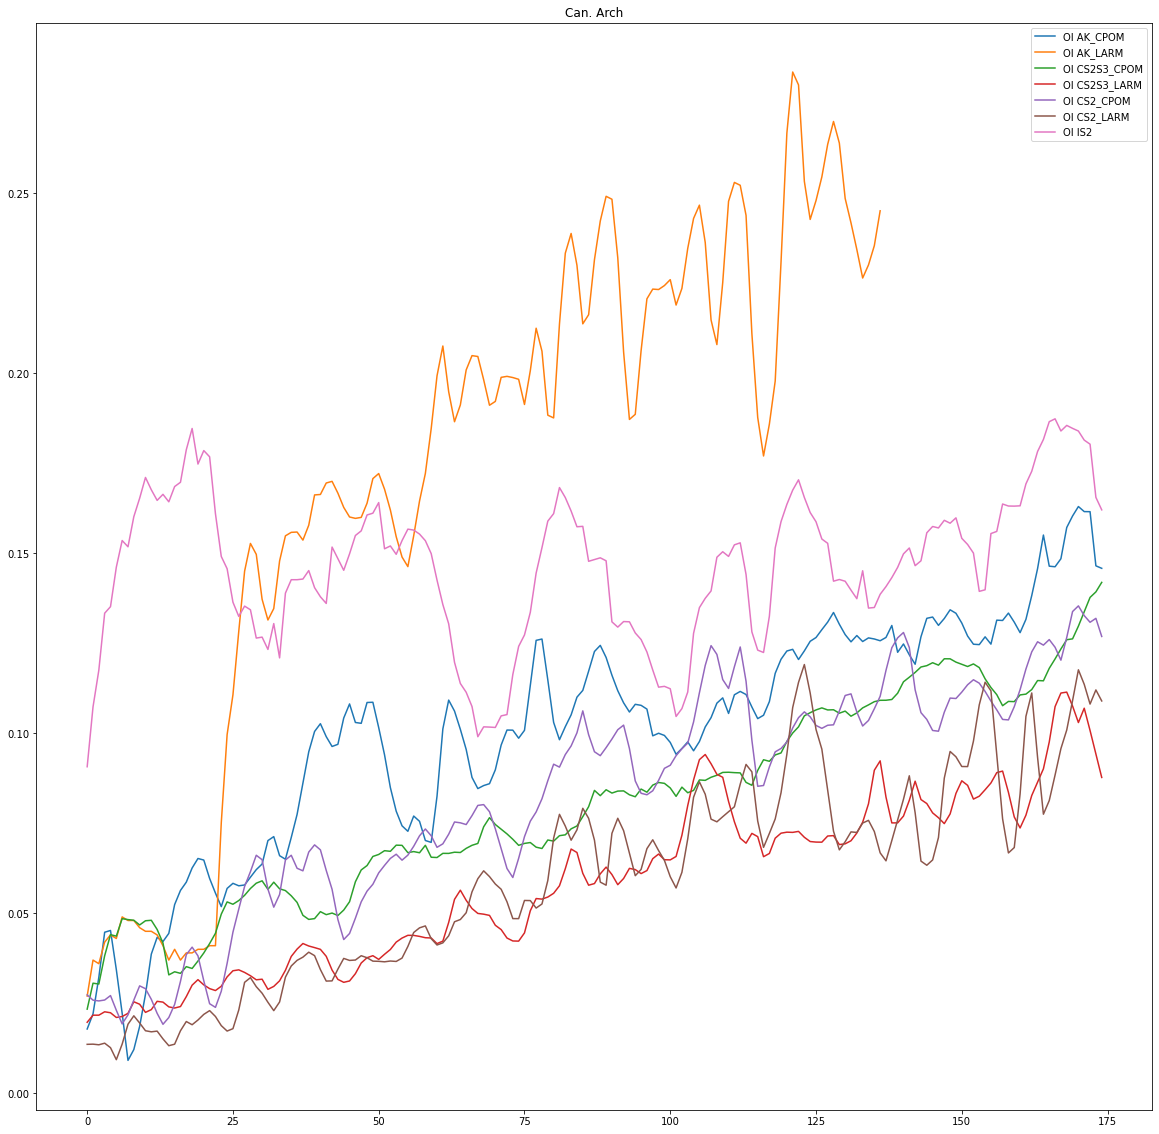

200
200
200
200
200
200
200


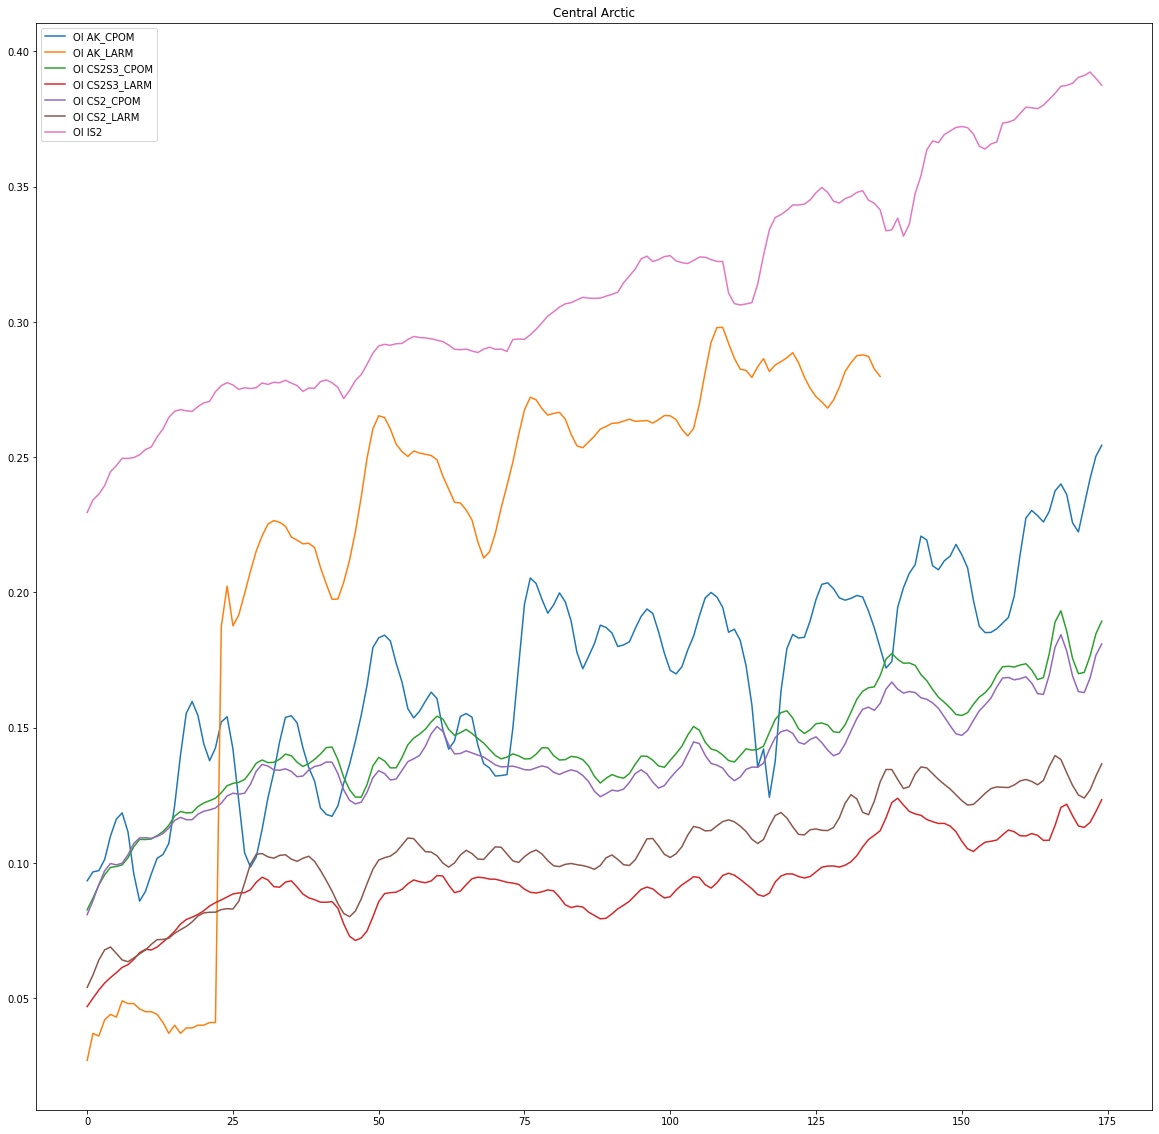

200
200
200
200
200
200
200


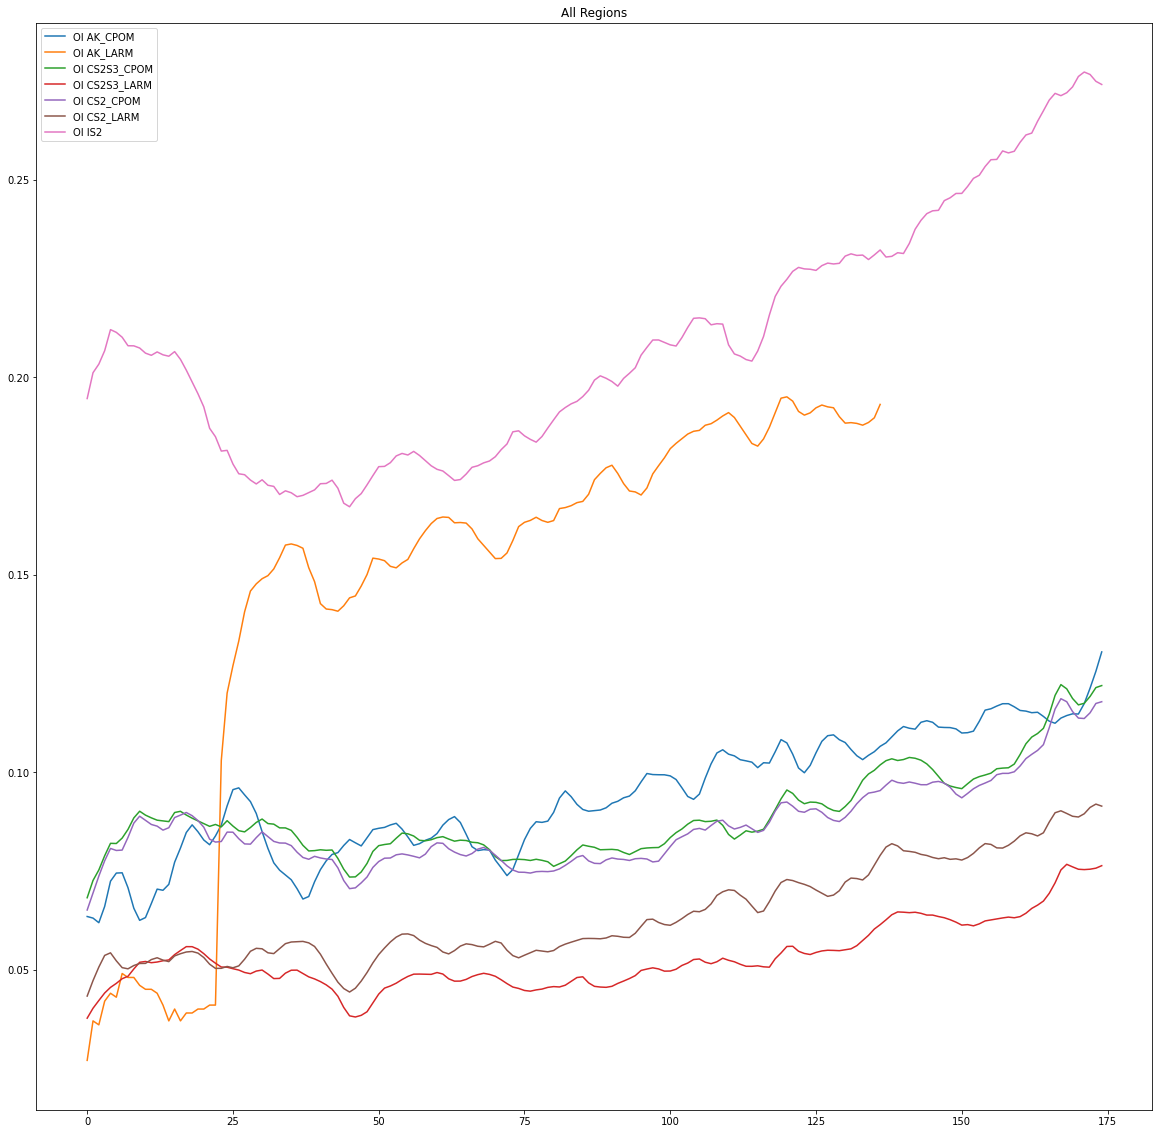

In [336]:
regions = [[9], [10], [11], [12], [13], [14], [15], [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,21]]
reg_name = ['Kara', 'Laptev', 'E. Siberian', 'Chukchi','Beaufort', 'Can. Arch', 'Central Arctic', 'All Regions']

fb_OI_regions = {}
for nr in range(8):
    fb_OI_regions[reg_name[nr]]={}
    for n in fb_OI.keys():
        print(i)   
        fb_OI_regions[reg_name[nr]][n]=[]

        for i in range(fb_OI[n].shape[0]):
            reg = np.isin(mask_EASE2,regions[nr])
            interp_mean = np.nanmean(fb_OI[n][i][reg])
            fb_OI_regions[reg_name[nr]][n].append(interp_mean)        
    
    plt.figure(figsize=(20, 20))

    for n in fb_OI.keys():
        plt.plot(fb_OI_regions[reg_name[nr]][n],label='OI '+n)
    plt.title(reg_name[nr])
    plt.legend()
    plt.savefig('OI_'+reg_name[nr]+'.png')
    plt.show()


#     fb_regions = []
#     fb_regions_3d = []    
#     fb_Bristol_regions = []
#     fb_OI_CS2S3_regions = []
#     fb_OI_Bristol_LARM_regions = []
# dict_keys(['CS2_CPOM', 'CS2S3_CPOM', 'CS2_LARM', 'AK_CPOM', 'CS2S3_LARM', 'IS2'])




In [326]:
fb_OI.keys()

dict_keys(['AK_CPOM', 'AK_LARM', 'CS2S3_CPOM', 'CS2S3_LARM', 'CS2_CPOM', 'CS2_LARM', 'IS2'])

In [323]:
fb_OI_regions['Kara'].keys()

dict_keys(['AK_CPOM', 'CS2S3_CPOM', 'CS2S3_LARM', 'CS2_CPOM', 'CS2_LARM', 'IS2'])

# BIN data regionally 

/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: Mean of empty slice
/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  
/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: Mean of empty slice
/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: Mean of empty slice
/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: Mean of empty slice
/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: Mean of empty slice
/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: Mean of empty slice


Kara


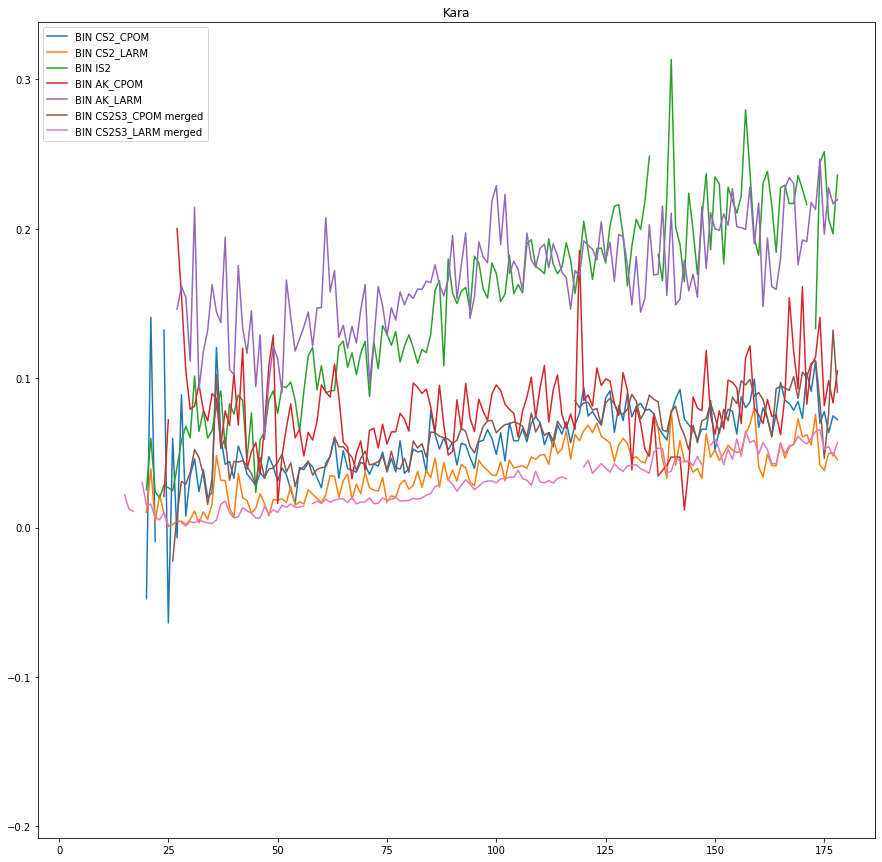

Laptev


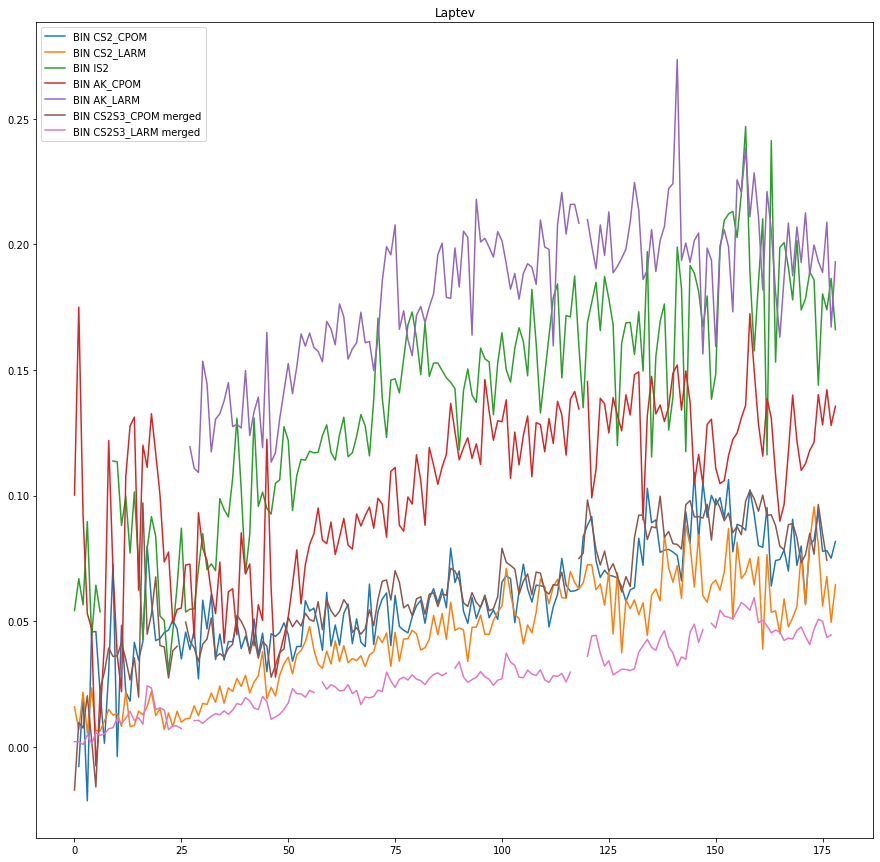

E. Siberian


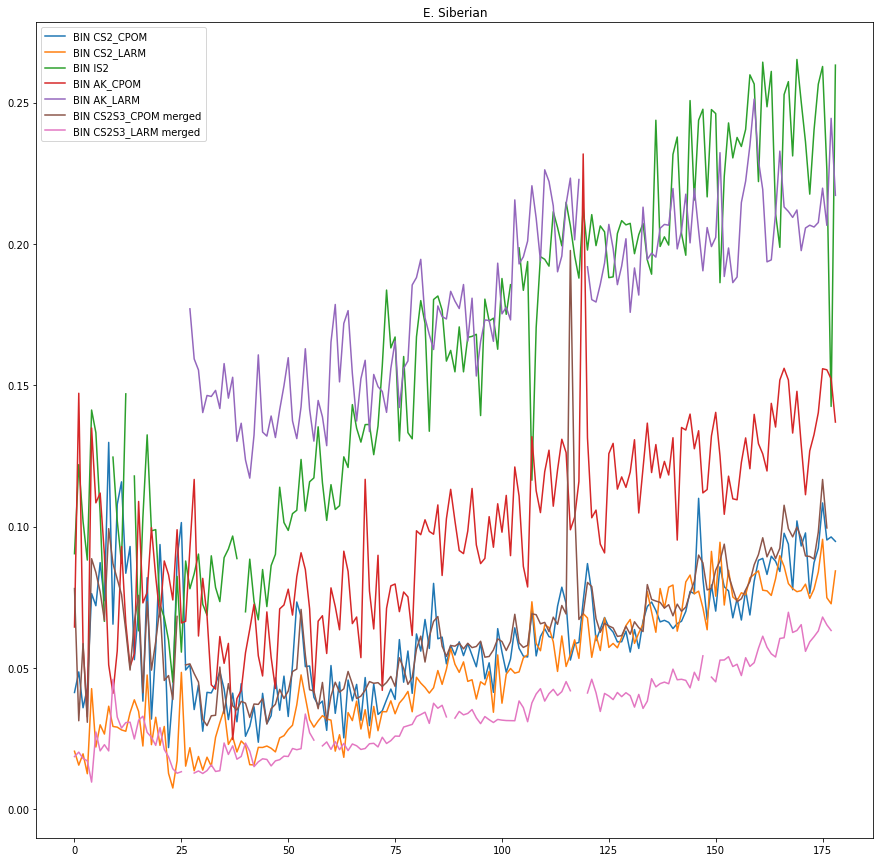

Chukchi


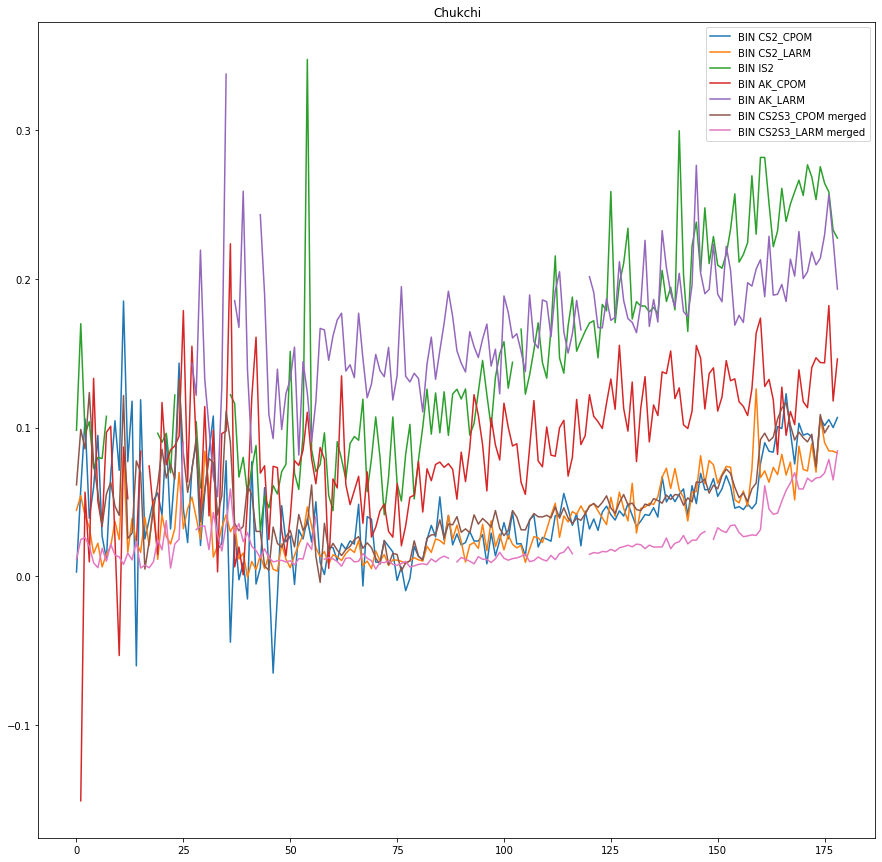

Beaufort


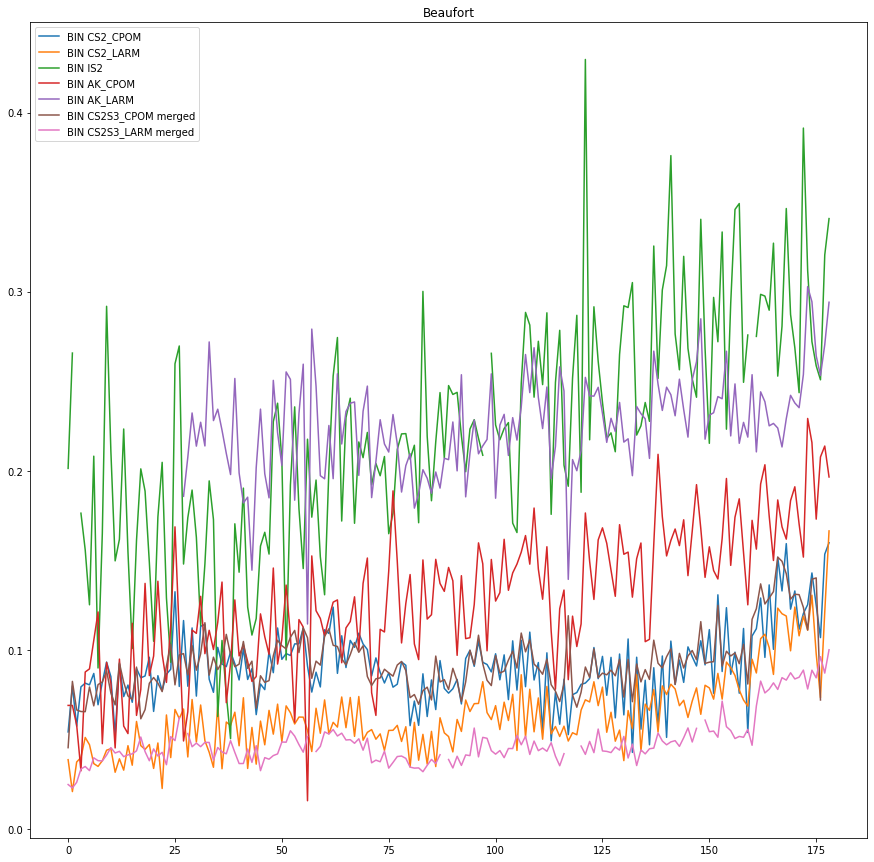

Can. Arch


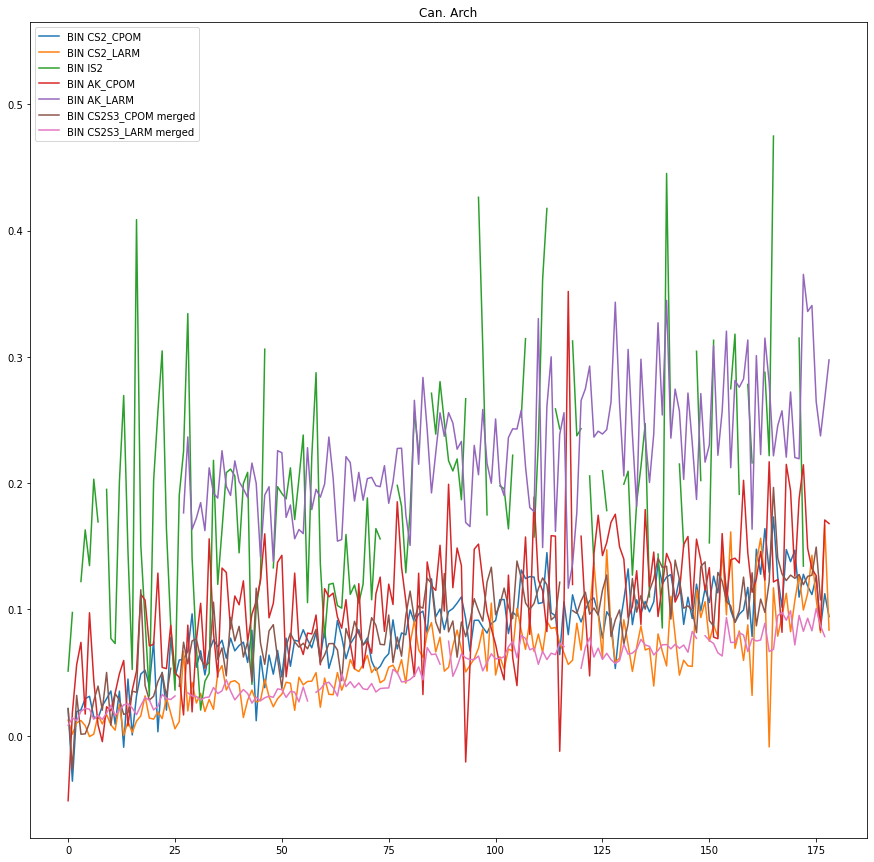

Central Arctic


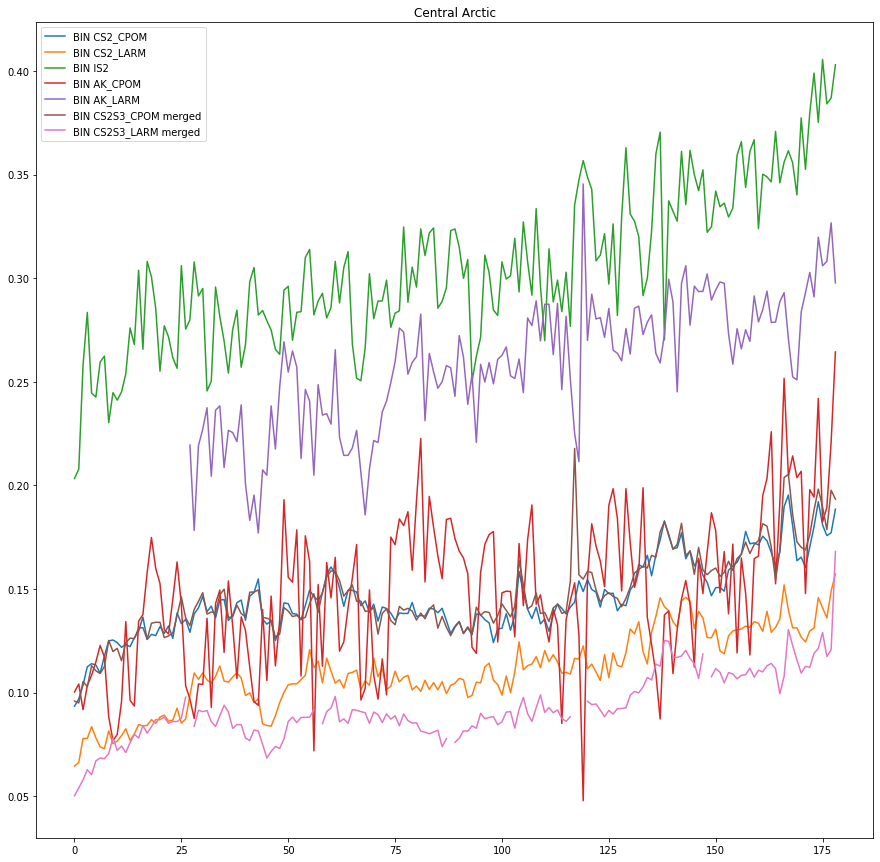

All Regions


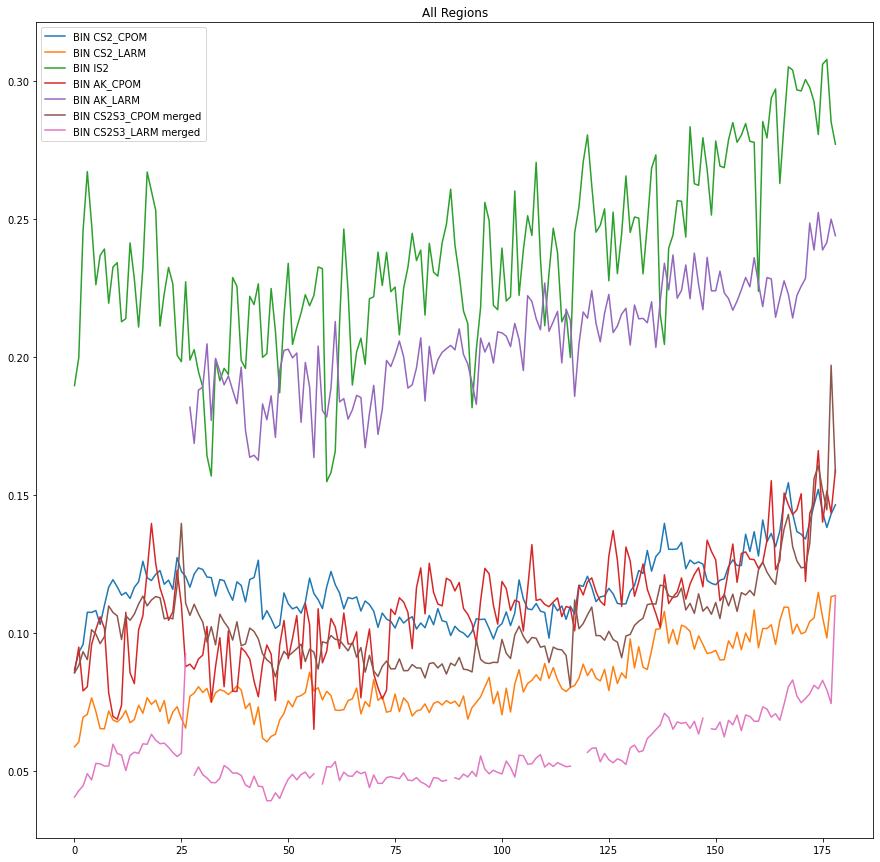

In [374]:
regions = [[9], [10], [11], [12], [13], [14], [15], [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,21]]
reg_name = ['Kara', 'Laptev', 'E. Siberian', 'Chukchi','Beaufort', 'Can. Arch', 'Central Arctic', 'All Regions']

fb_BIN_regions = {}
for nr in range(8):
    fb_BIN_regions[reg_name[nr]]={}    
    for n in fb_BIN.keys():
        if n=='CS2S3_CPOM':
            fb_BIN_regions[reg_name[nr]][n]={}
            for k in fb_BIN[n].keys():
                fb_BIN_regions[reg_name[nr]][n][k]=[]
                for i in range(fb_BIN[n][k].shape[0]):
                    reg = np.isin(mask_EASE2,regions[nr])
                    interp_mean = np.nanmean(fb_BIN[n][k][i][reg])
                    fb_BIN_regions[reg_name[nr]][n][k].append(interp_mean)                  
            reg = np.isin(mask_EASE2,regions[nr])
            fb_BIN_regions[reg_name[nr]][n]['merged']=[]
            for i in range(fb_BIN[n][k].shape[0]):
                temp1=np.nanmean(np.array([fb_BIN[n]['CS2_SARIN'][i],fb_BIN[n]['CS2_SAR'][i],fb_BIN[n]['S3A'][i],fb_BIN[n]['S3B'][i]]), axis=0)
                interp_mean = np.nanmean(temp1[reg])
    #                 print(interp_mean)
                fb_BIN_regions[reg_name[nr]][n]['merged'].append(interp_mean)  
    #             print(fb_BIN_regions[n]['merged'][reg_name[nr]])

        elif n=='CS2S3_LARM':
            fb_BIN_regions[reg_name[nr]][n]={}
            for k in fb_BIN[n].keys():
                fb_BIN_regions[reg_name[nr]][n][k]=[]
                for i in range(fb_BIN[n][k].shape[0]):
                    reg = np.isin(mask_EASE2,regions[nr])
                    interp_mean = np.nanmean(fb_BIN[n][k][i][reg])
                    fb_BIN_regions[reg_name[nr]][n][k].append(interp_mean)                  
            reg = np.isin(mask_EASE2,regions[nr])
            fb_BIN_regions[reg_name[nr]][n]['merged']=[]
            print(reg_name[nr])
            for i in range(fb_BIN[n][k].shape[0]):
                temp1=np.nanmean(np.array([fb_BIN[n]['CS2'][i],fb_BIN[n]['S3'][i]]), axis=0)
                interp_mean = np.nanmean(temp1[reg])
    #                 print(interp_mean)
                fb_BIN_regions[reg_name[nr]][n]['merged'].append(interp_mean)  
    #             print(fb_BIN_regions[n]['merged'][reg_name[nr]])



            
        else:
            fb_BIN_regions[reg_name[nr]][n]=[]
            for i in range(fb_BIN[n].shape[0]):
                reg = np.isin(mask_EASE2,regions[nr])
                interp_mean = np.nanmean(fb_BIN[n][i][reg])
                fb_BIN_regions[reg_name[nr]][n].append(interp_mean)                  



      
    plt.figure(figsize=(15, 15))
    for n in fb_BIN.keys():
        if n=='CS2S3_CPOM':
#             for k in fb_BIN[n].keys():
#                 plt.plot(fb_BIN_regions[n][k][reg_name[nr]],label='BIN '+n+k)
            plt.plot(fb_BIN_regions[reg_name[nr]][n]['merged'],label='BIN '+n+' merged')

        elif n=='CS2S3_LARM':
#             for k in fb_BIN[n].keys():
#                 plt.plot(fb_BIN_regions[n][k][reg_name[nr]],label='BIN '+n+k)
            plt.plot(fb_BIN_regions[reg_name[nr]][n]['merged'],label='BIN '+n+' merged')

        else:
            plt.plot(fb_BIN_regions[reg_name[nr]][n],label='BIN '+n)

            
    plt.title(reg_name[nr])
    plt.legend()
    plt.savefig('BIN_'+reg_name[nr]+'.png')
    plt.show()



In [454]:
# fb_BIN_regions['Kara']

In [455]:
# fb_BIN_regions['Kara']['CS2_LARM']

In [456]:
# fb_OI_regions['CS2S3_CPOM']

# Compare OI & BIN

In [410]:
fb_BIN.keys()

dict_keys(['CS2_CPOM', 'CS2_LARM', 'IS2', 'AK_CPOM', 'AK_LARM', 'CS2S3_CPOM', 'CS2S3_LARM'])

In [409]:
fb_OI.keys()

dict_keys(['AK_CPOM', 'AK_LARM', 'CS2S3_CPOM', 'CS2S3_LARM', 'CS2_CPOM', 'CS2_LARM', 'IS2'])

In [457]:
# fb_OI['CS2S3_CPOM']

0
1
2
3
4
5
6


/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/ipykernel_launcher.py:69: RuntimeWarning: Mean of empty slice
/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/ipykernel_launcher.py:74: RuntimeWarning: Mean of empty slice
/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice
/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: Mean of empty slice
/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: Mean of empty slice
/Users/micheltsamados/miniconda3/envs/basemap_test/lib/python3.6/site-packages/ipykernel_launcher.py:45: RuntimeWarning: Mean of empty slice
/Users/michel

Kara


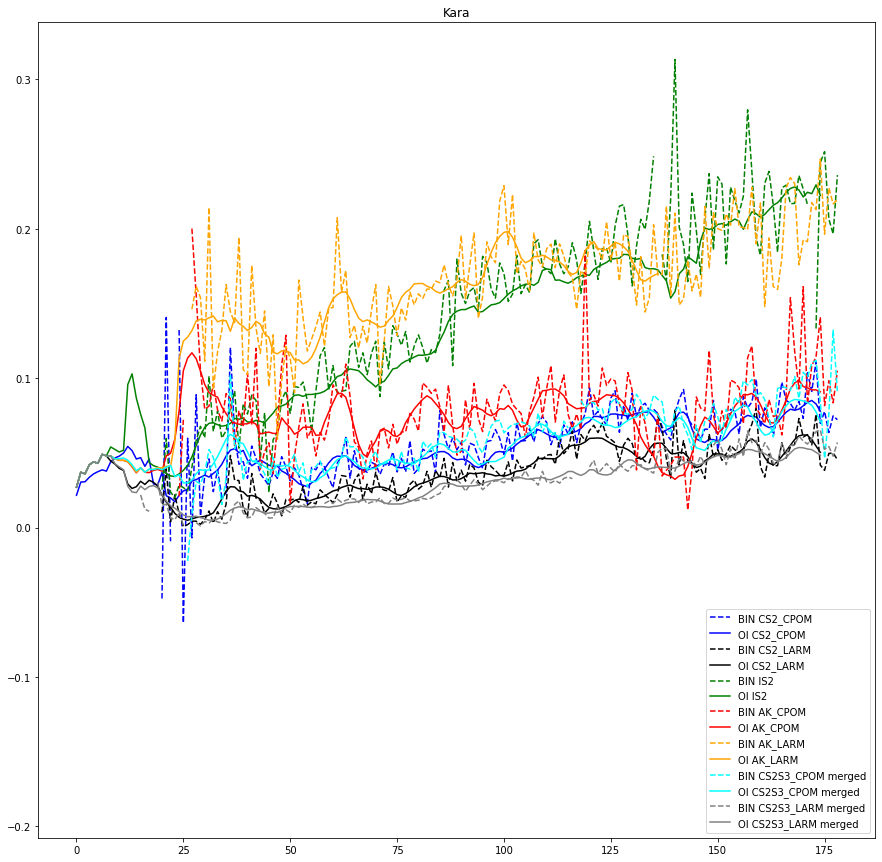

Laptev


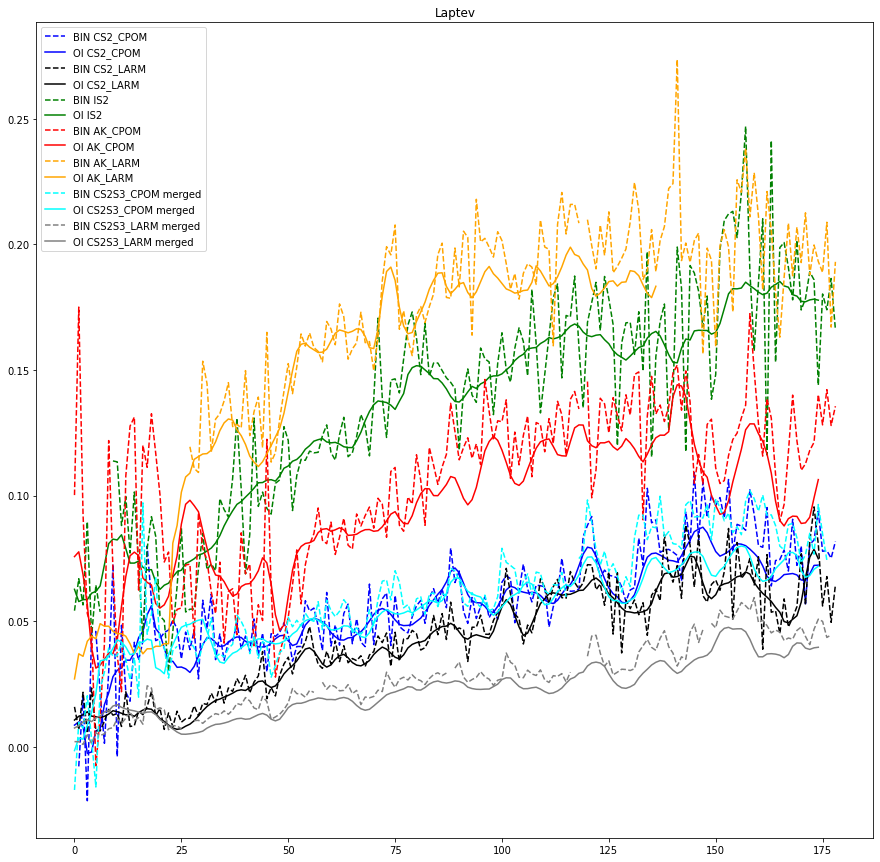

E. Siberian


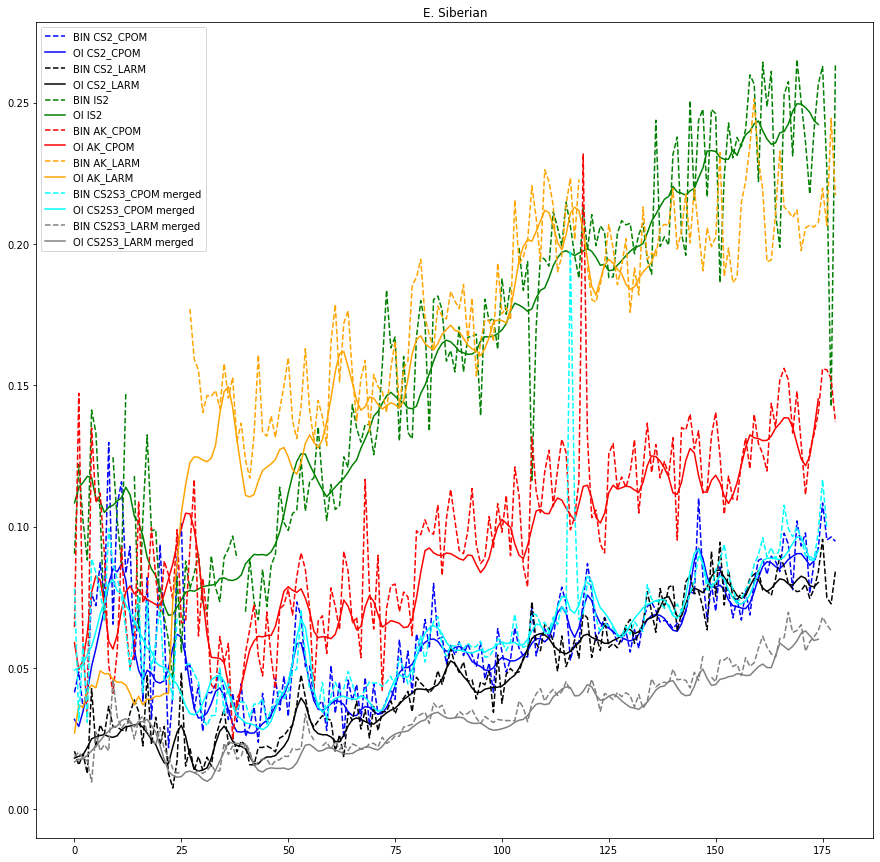

Chukchi


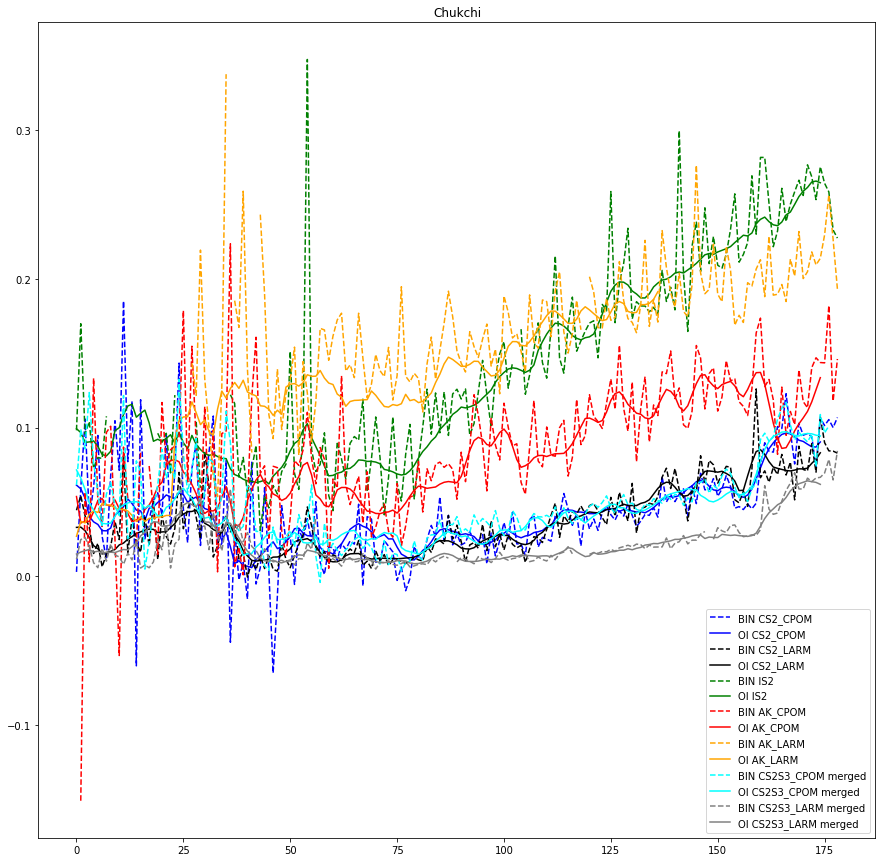

Beaufort


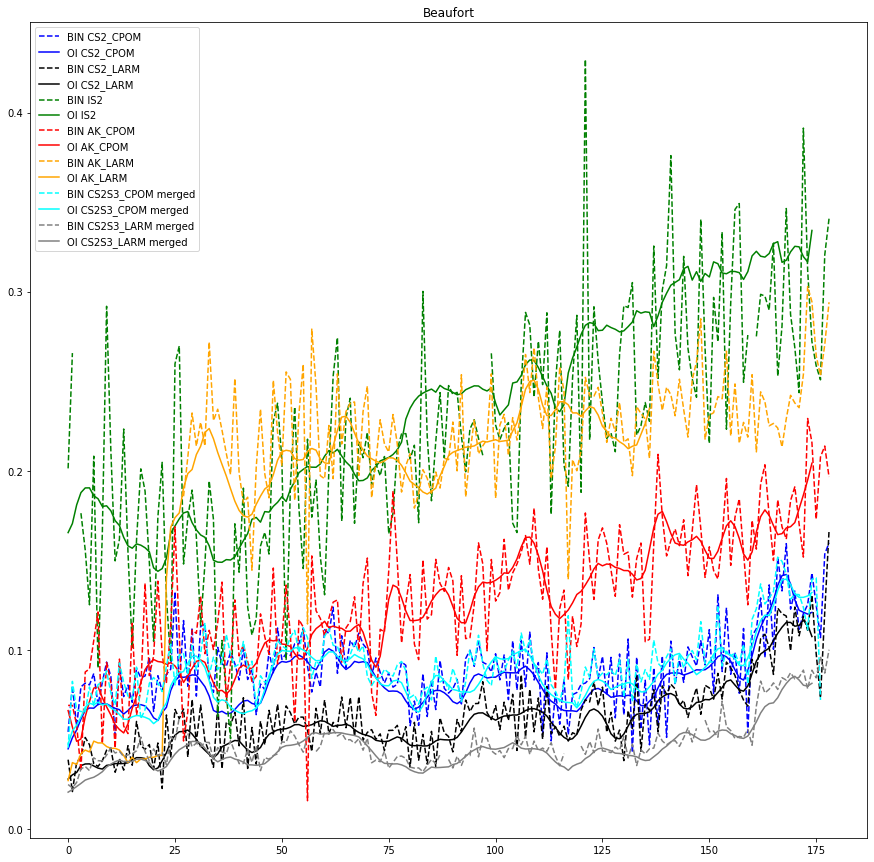

Can. Arch


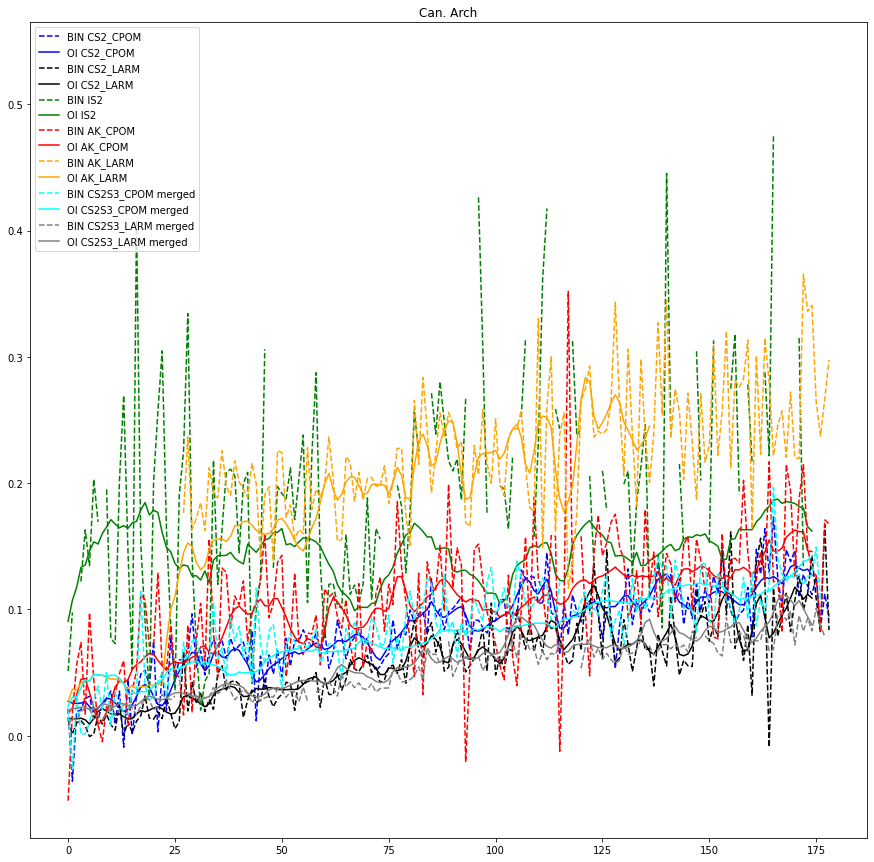

Central Arctic


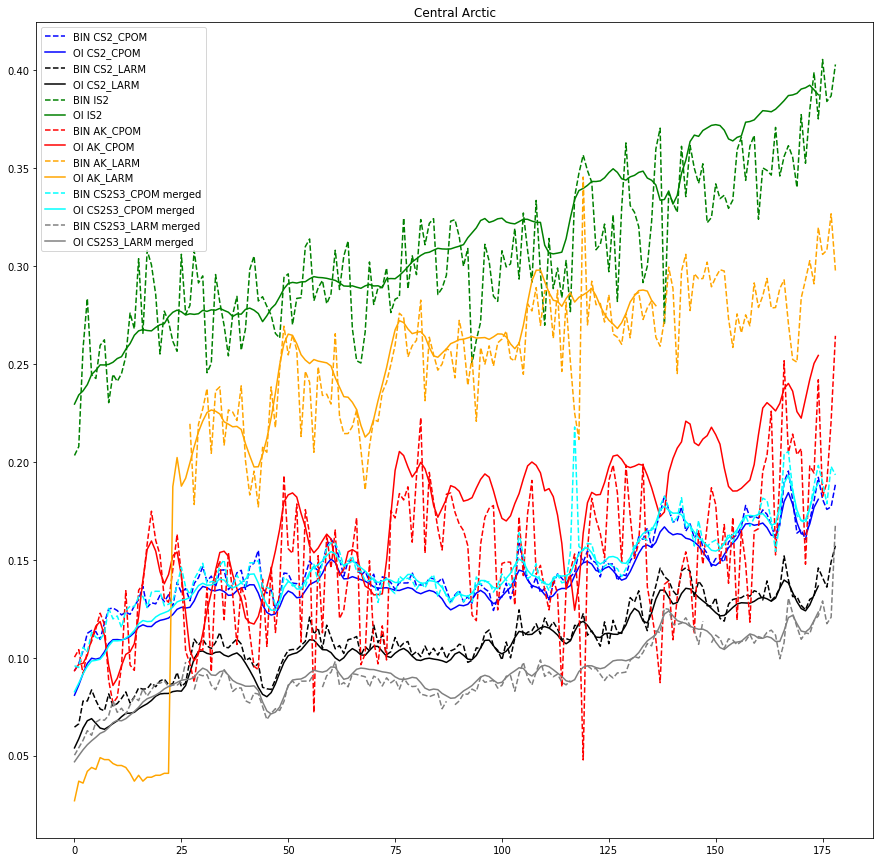

All Regions


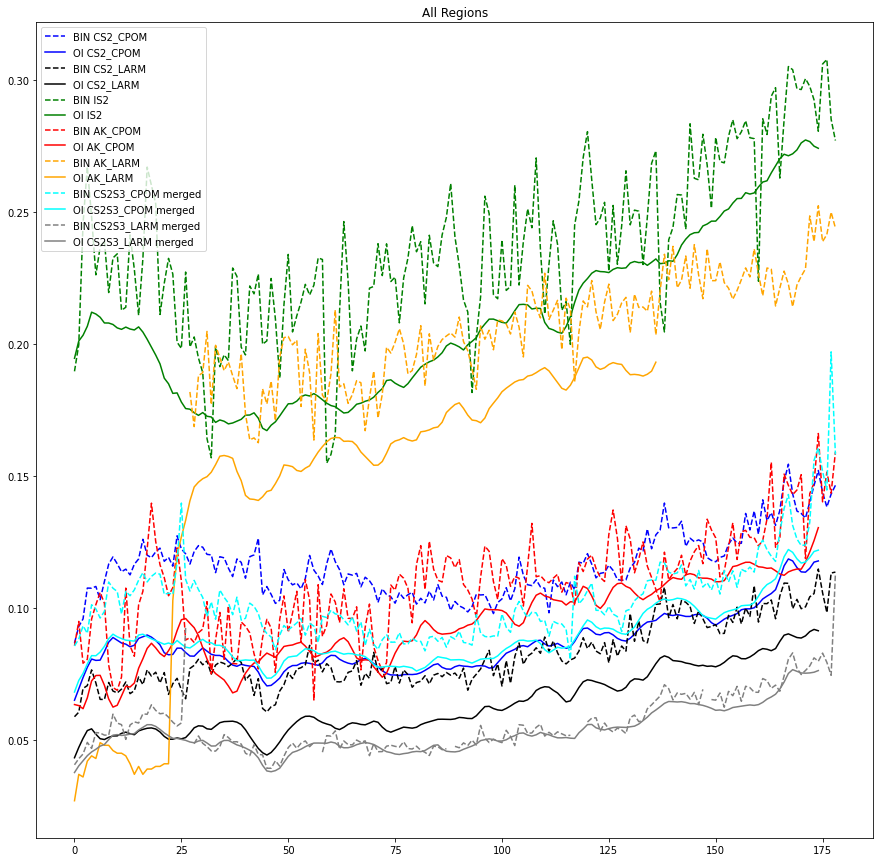

In [453]:
colors=['b','black','g','r','orange','cyan','grey']
colors_dict={}
c=-1
for n in fb_BIN.keys():
    c=c+1
    print(c)
    colors_dict[n]=colors[c]
    
regions = [[9], [10], [11], [12], [13], [14], [15], [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,21]]
reg_name = ['Kara', 'Laptev', 'E. Siberian', 'Chukchi','Beaufort', 'Can. Arch', 'Central Arctic', 'All Regions']

fb_BIN_regions = {}
fb_OI_regions_new = {}

for nr in range(8):
    fb_BIN_regions[reg_name[nr]]={}   
    fb_OI_regions_new[reg_name[nr]]={}   
    for n in fb_BIN.keys():
        if n=='CS2S3_CPOM':
            fb_BIN_regions[reg_name[nr]][n]={}
            for k in fb_BIN[n].keys():
                fb_BIN_regions[reg_name[nr]][n][k]=[]
                for i in range(fb_BIN[n][k].shape[0]):
                    reg = np.isin(mask_EASE2,regions[nr])
                    interp_mean = np.nanmean(fb_BIN[n][k][i][reg])
                    fb_BIN_regions[reg_name[nr]][n][k].append(interp_mean)     
            fb_OI_regions_new[reg_name[nr]][n]=[]
            for i in range(fb_BIN[n][k].shape[0]):
                reg = np.isin(mask_EASE2,regions[nr])
                interp_mean = np.nanmean(fb_OI[n][i][reg])
                fb_OI_regions_new[reg_name[nr]][n].append(interp_mean)                          
            reg = np.isin(mask_EASE2,regions[nr])
            fb_BIN_regions[reg_name[nr]][n]['merged']=[]
            for i in range(fb_BIN[n][k].shape[0]):
                temp1=np.nanmean(np.array([fb_BIN[n]['CS2_SARIN'][i],fb_BIN[n]['CS2_SAR'][i],fb_BIN[n]['S3A'][i],fb_BIN[n]['S3B'][i]]), axis=0)
                interp_mean = np.nanmean(temp1[reg])
                fb_BIN_regions[reg_name[nr]][n]['merged'].append(interp_mean)  

        elif n=='CS2S3_LARM':
            fb_BIN_regions[reg_name[nr]][n]={}
            for k in fb_BIN[n].keys():
                fb_BIN_regions[reg_name[nr]][n][k]=[]
                for i in range(fb_BIN[n][k].shape[0]):
                    reg = np.isin(mask_EASE2,regions[nr])
                    interp_mean = np.nanmean(fb_BIN[n][k][i][reg])
                    fb_BIN_regions[reg_name[nr]][n][k].append(interp_mean)                  
            fb_OI_regions_new[reg_name[nr]][n]=[]
            for i in range(fb_BIN[n][k].shape[0]):
                reg = np.isin(mask_EASE2,regions[nr])
                interp_mean = np.nanmean(fb_OI[n][i][reg])
                fb_OI_regions_new[reg_name[nr]][n].append(interp_mean)    
            reg = np.isin(mask_EASE2,regions[nr])
            fb_BIN_regions[reg_name[nr]][n]['merged']=[]
            print(reg_name[nr])
            for i in range(fb_BIN[n][k].shape[0]):
                temp1=np.nanmean(np.array([fb_BIN[n]['CS2'][i],fb_BIN[n]['S3'][i]]), axis=0)
                interp_mean = np.nanmean(temp1[reg])
    #                 print(interp_mean)
                fb_BIN_regions[reg_name[nr]][n]['merged'].append(interp_mean)  
    #             print(fb_BIN_regions[n]['merged'][reg_name[nr]])



            
        else:
            fb_BIN_regions[reg_name[nr]][n]=[]
            for i in range(fb_BIN[n].shape[0]):
                reg = np.isin(mask_EASE2,regions[nr])
                interp_mean = np.nanmean(fb_BIN[n][i][reg])
                fb_BIN_regions[reg_name[nr]][n].append(interp_mean)                  
            fb_OI_regions[reg_name[nr]][n]=[]
            for i in range(fb_BIN[n].shape[0]):
                reg = np.isin(mask_EASE2,regions[nr])
                interp_mean = np.nanmean(fb_OI[n][i][reg])
                fb_OI_regions[reg_name[nr]][n].append(interp_mean)     


      
    plt.figure(figsize=(15, 15))
    for n in fb_BIN.keys():
        if n=='CS2S3_CPOM':
#             for k in fb_BIN[n].keys():
#                 plt.plot(fb_BIN_regions[n][k][reg_name[nr]],label='BIN '+n+k)
            plt.plot(fb_BIN_regions[reg_name[nr]][n]['merged'][0:200],color=colors_dict[n],linestyle='--',label='BIN '+n+' merged')
            plt.plot(fb_OI_regions[reg_name[nr]][n][0:200],color=colors_dict[n],label='OI '+n+' merged')


        elif n=='CS2S3_LARM':
#             for k in fb_BIN[n].keys():
#                 plt.plot(fb_BIN_regions[n][k][reg_name[nr]],label='BIN '+n+k)
            plt.plot(fb_BIN_regions[reg_name[nr]][n]['merged'][0:200],color=colors_dict[n],linestyle='--',label='BIN '+n+' merged')
            plt.plot(fb_OI_regions[reg_name[nr]][n][0:200],color=colors_dict[n],label='OI '+n+' merged')


        else:
            plt.plot(fb_BIN_regions[reg_name[nr]][n][0:200],color=colors_dict[n],linestyle='--',label='BIN '+n)
            plt.plot(fb_OI_regions[reg_name[nr]][n][0:200],color=colors_dict[n],label='OI '+n)


            
    plt.title(reg_name[nr])
    plt.legend()
    plt.savefig('BIN_vs_OI_'+reg_name[nr]+'.png')
    plt.show()




In [450]:
colors_dict[n]

'grey'

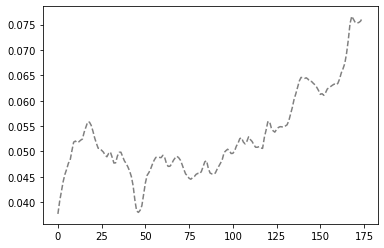

In [449]:
plt.plot(fb_OI_regions[reg_name[nr]][n][0:200],color=colors_dict[n],linestyle='--',label='OI '+n+' merged')



In [445]:
colors=['b','black','g','r','orange','cyan','grey']
colors_dict={}
c=-1
for n in fb_BIN.keys():
    c=c+1
    print(c)
    colors_dict[n]=colors[c]

0
1
2
3
4
5
6


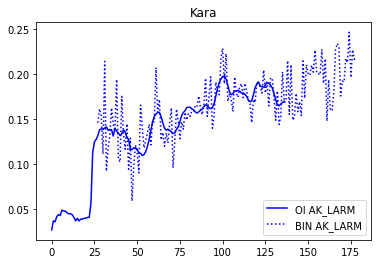

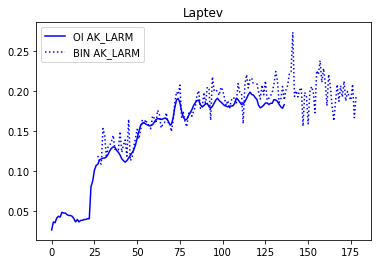

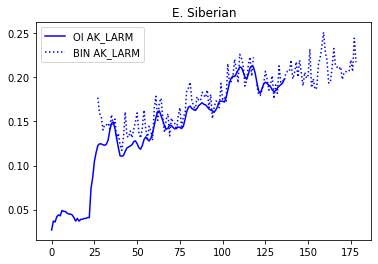

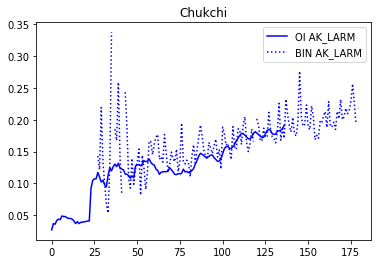

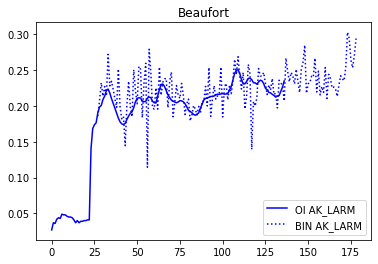

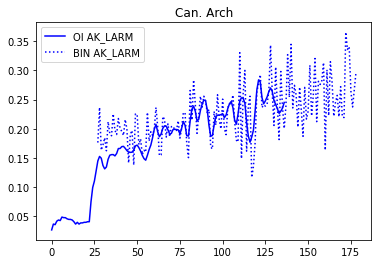

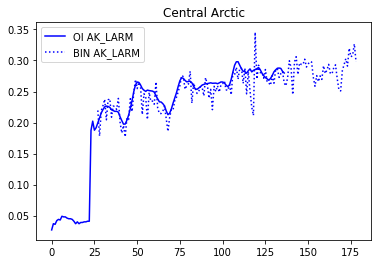

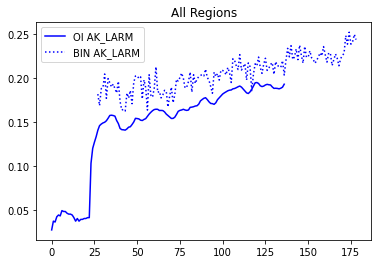

In [390]:
n='AK_LARM'
for nr in range(8):
    plt.plot(fb_OI_regions[reg_name[nr]][n],color='b',label='OI '+n)
    plt.plot(fb_BIN_regions[reg_name[nr]][n],color='b',linestyle=':',label='BIN '+n)
    plt.title(reg_name[nr])
    plt.legend()
    plt.savefig('BIN_vs_OI_'+reg_name[nr]+'_'+n+'.png')
    plt.show()

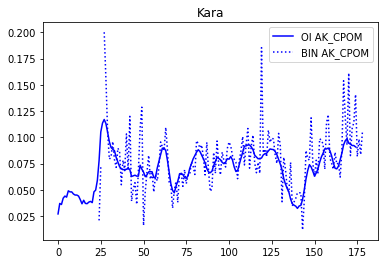

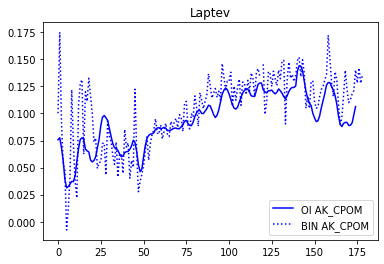

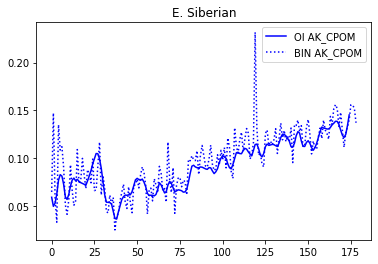

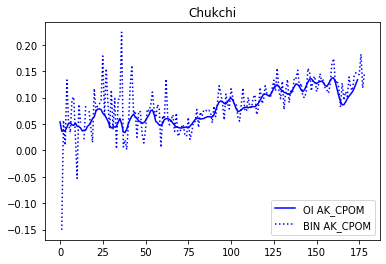

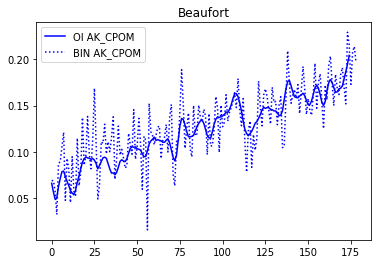

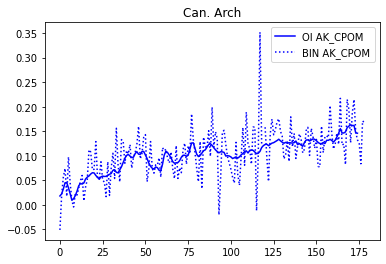

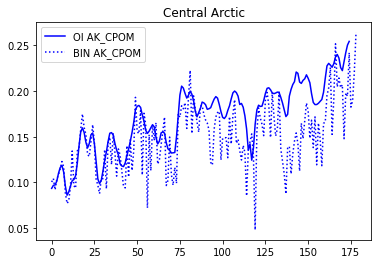

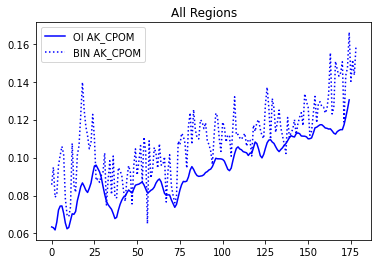

In [391]:
n='AK_CPOM'
for nr in range(8):
    plt.plot(fb_OI_regions[reg_name[nr]][n],color='b',label='OI '+n)
    plt.plot(fb_BIN_regions[reg_name[nr]][n],color='b',linestyle=':',label='BIN '+n)
    plt.title(reg_name[nr])
    plt.legend()
    plt.savefig('BIN_vs_OI_'+reg_name[nr]+'_'+n+'.png')
    plt.show()

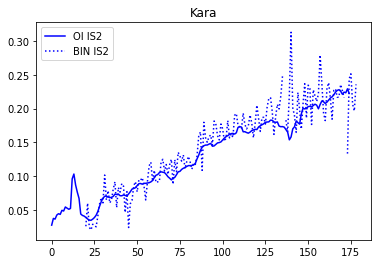

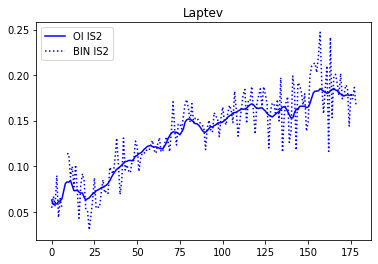

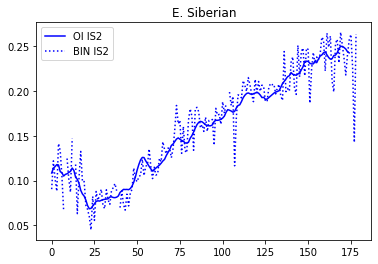

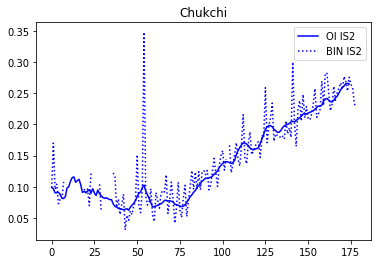

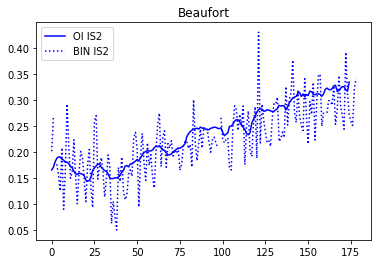

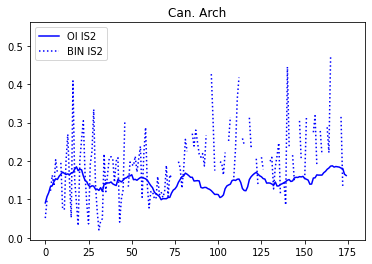

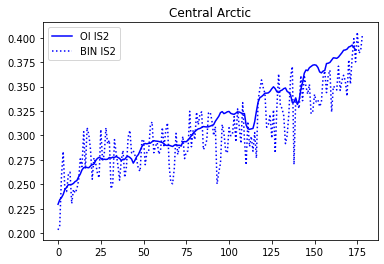

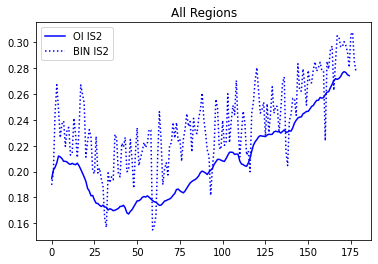

In [379]:
n='IS2'
for nr in range(8):
    plt.plot(fb_OI_regions[reg_name[nr]][n],color='b',label='OI '+n)
    plt.plot(fb_BIN_regions[reg_name[nr]][n],color='b',linestyle=':',label='BIN '+n)
    plt.title(reg_name[nr])
    plt.legend()
    plt.savefig('BIN_vs_OI_'+reg_name[nr]+'_'+n+'.png')
    plt.show()


In [402]:
fb_BIN_regions[reg_name[nr]][n]

{'CS2_SARIN': [nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  0.023837499999999998,
  nan,
  0.12409999999999999,
  nan,
  nan,
  nan,
  nan,
  0.0754,
  0.06717333333333332,
  0.035425,
  -0.3167,
  nan,
  0.02316666666666667,
  0.02657666666666666,
  0.0379,
  nan,
  nan,
  nan,
  nan,
  0.04402500000000001,
  nan,
  0.1375,
  0.15633333333333332,
  0.10836091954022989,
  -0.034019999999999995,
  -0.0493,
  nan,
  nan,
  0.10446388888888891,
  0.051125,
  0.16339175824175825,
  nan,
  nan,
  nan,
  nan,
  -0.08526666666666667,
  0.08818766666666666,
  0.028498710317460315,
  0.07502166666666665,
  0.07071974789915966,
  0.09601388888888887,
  0.09643571428571429,
  nan,
  0.04445,
  nan,
  nan,
  nan,
  nan,
  0.001974999999999994,
  0.3633,
  0.0927,
  0.12377045454545454,
  0.08650089285714285,

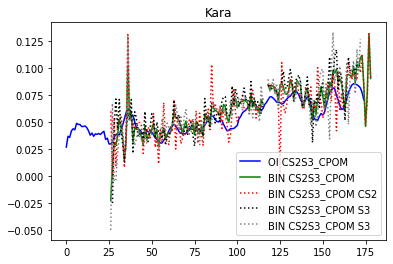

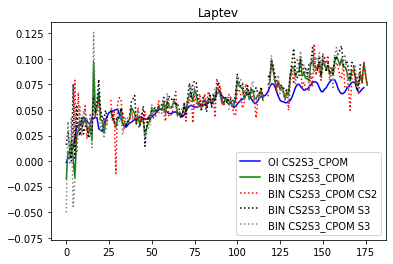

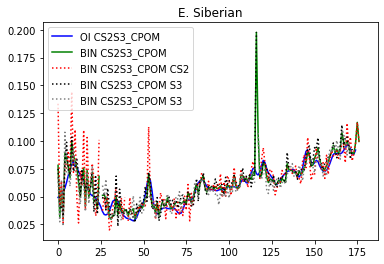

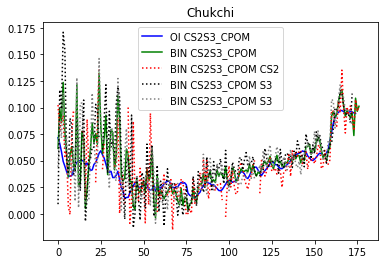

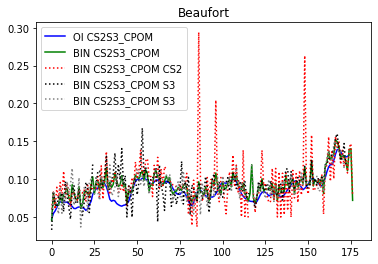

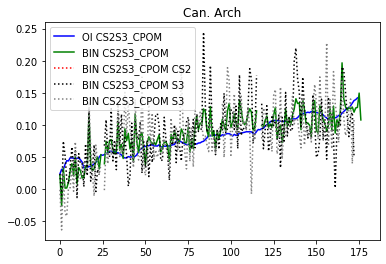

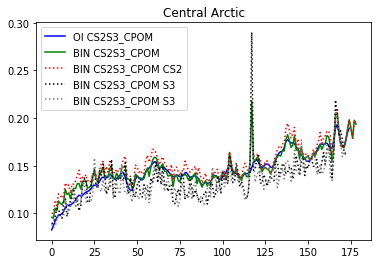

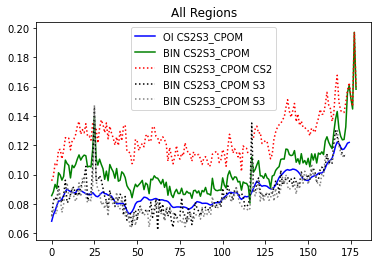

In [408]:
n='CS2S3_CPOM'
for nr in range(8):
    plt.plot(fb_OI_regions[reg_name[nr]][n],color='b',label='OI '+n)
    plt.plot(fb_BIN_regions[reg_name[nr]][n]['merged'],color='g',linestyle='-',label='BIN '+n)
#     plt.plot(fb_BIN_regions[reg_name[nr]][n]['CS2_SARIN'],color='r',linestyle='-',label='BIN '+n+' CS2')
    plt.plot(fb_BIN_regions[reg_name[nr]][n]['CS2_SAR'],color='r',linestyle=':',label='BIN '+n+' CS2')
    plt.plot(fb_BIN_regions[reg_name[nr]][n]['S3A'],color='black',linestyle=':',label='BIN '+n+' S3')
    plt.plot(fb_BIN_regions[reg_name[nr]][n]['S3B'],color='grey',linestyle=':',label='BIN '+n+' S3')
    plt.title(reg_name[nr])
    plt.legend()
    plt.savefig('BIN_vs_OI_'+reg_name[nr]+'_'+n+'.png')
    plt.show()



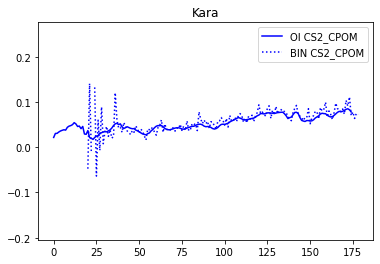

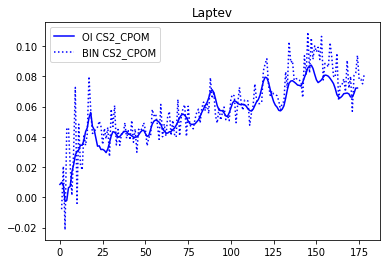

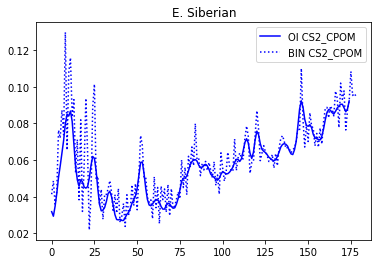

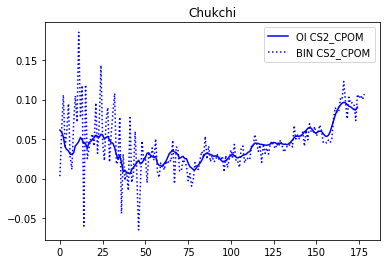

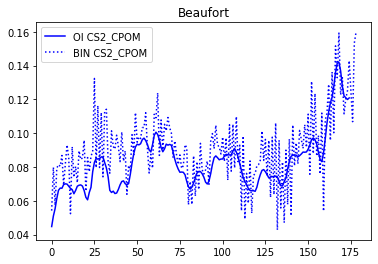

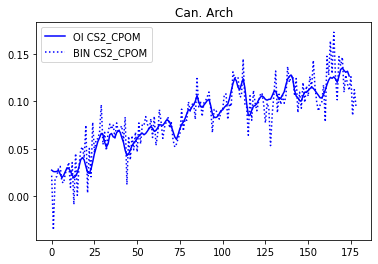

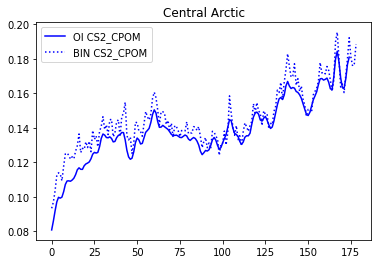

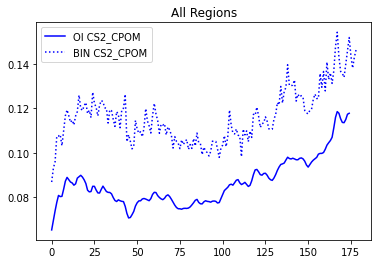

In [381]:
n='CS2_CPOM'
for nr in range(8):
    plt.plot(fb_OI_regions[reg_name[nr]][n],color='b',label='OI '+n)
    plt.plot(fb_BIN_regions[reg_name[nr]][n],color='b',linestyle=':',label='BIN '+n)
    plt.title(reg_name[nr])
    plt.legend()
    plt.savefig('BIN_vs_OI_'+reg_name[nr]+'_'+n+'.png')
    plt.show()


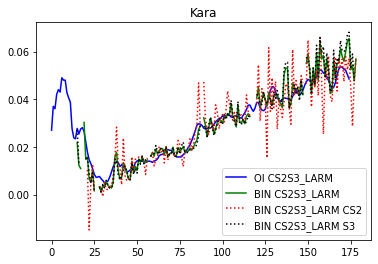

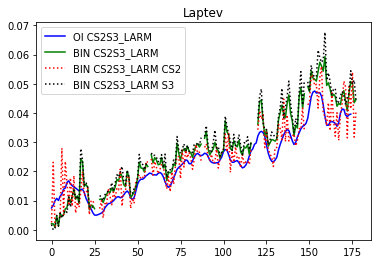

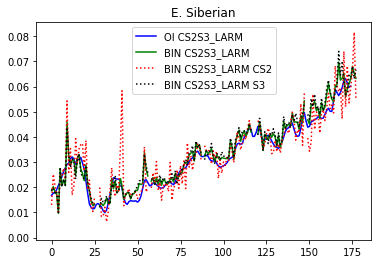

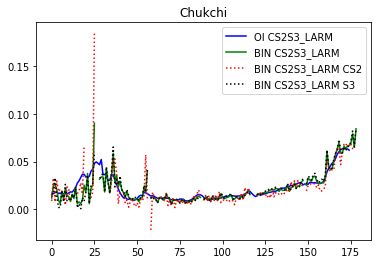

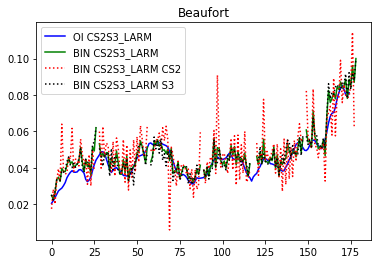

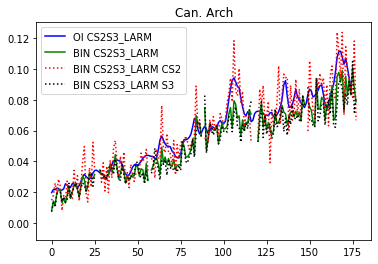

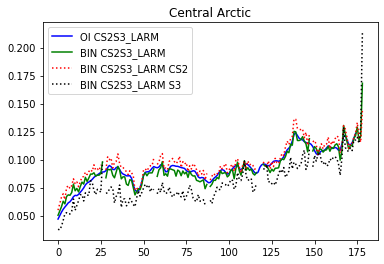

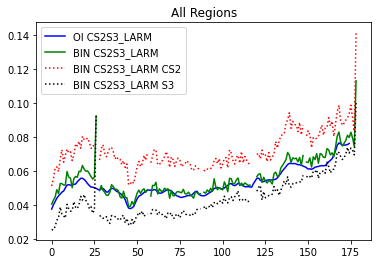

In [405]:
n='CS2S3_LARM'
for nr in range(8):
    plt.plot(fb_OI_regions[reg_name[nr]][n],color='b',label='OI '+n)
    plt.plot(fb_BIN_regions[reg_name[nr]][n]['merged'],color='g',linestyle='-',label='BIN '+n)
    plt.plot(fb_BIN_regions[reg_name[nr]][n]['CS2'],color='r',linestyle=':',label='BIN '+n+' CS2')
    plt.plot(fb_BIN_regions[reg_name[nr]][n]['S3'],color='black',linestyle=':',label='BIN '+n+' S3')
    plt.title(reg_name[nr])
    plt.legend()
    plt.savefig('BIN_vs_OI_'+reg_name[nr]+'_'+n+'.png')
    plt.show()




In [385]:
fb_OI_regions['Kara'].keys()

dict_keys(['AK_CPOM', 'AK_LARM', 'CS2S3_CPOM', 'CS2S3_LARM', 'CS2_CPOM', 'CS2_LARM', 'IS2'])

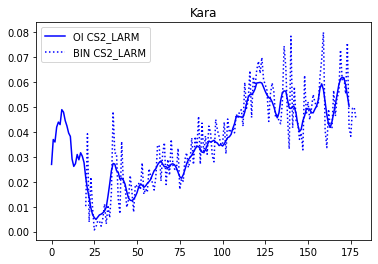

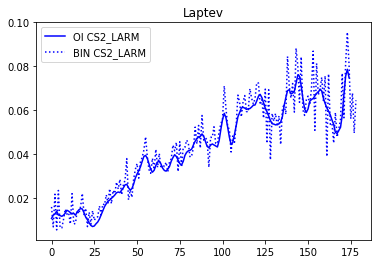

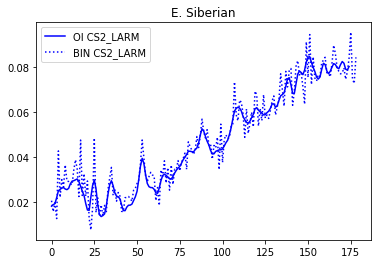

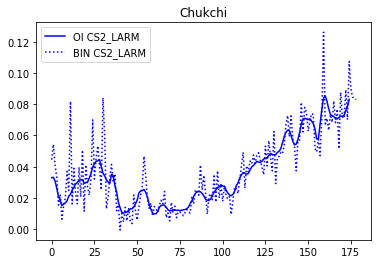

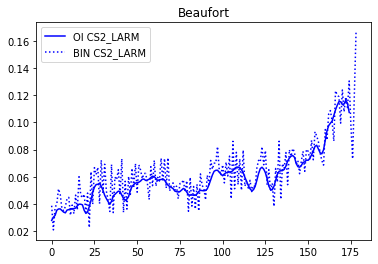

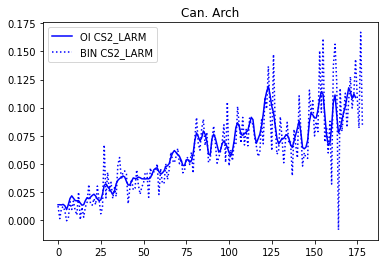

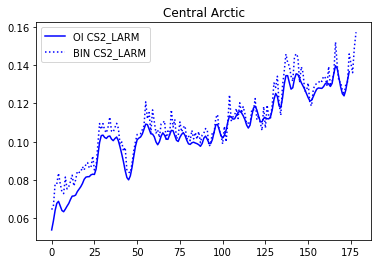

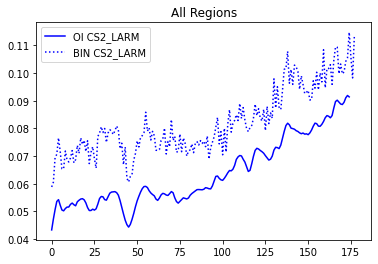

In [386]:
n='CS2_LARM'
for nr in range(8):
    plt.plot(fb_OI_regions[reg_name[nr]][n],color='b',label='OI '+n)
    plt.plot(fb_BIN_regions[reg_name[nr]][n],color='b',linestyle=':',label='BIN '+n)
    plt.title(reg_name[nr])
    plt.legend()
    plt.savefig('BIN_vs_OI_'+reg_name[nr]+'_'+n+'.png')
    plt.show()



